In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
import time
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.cluster import DBSCAN
import matplotlib.gridspec as gridspec
from scipy.stats import probplot

warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('train_dataset.csv')
pd.set_option('display.max_columns', None)
df.head()

Depth: TMD  Bit Position  Torque Min  Torque Avg  Torque Max  WOH Max  \
0      740.32        730.01         0.0         0.0         0.0     20.0   
1      740.32        730.01         0.0         0.0         0.0     20.0   
2      740.32        730.01         0.0         0.0         0.0     20.0   
3      740.32        730.01         0.0         0.0         0.0     20.0   
4      740.32        730.01         0.0         0.0         0.0     20.0   

   WOH Avg  WOH Inst  WOB Max  WOB Avg  ROP (Time)  RPM Avg  RPM Inst  \
0     20.0      20.0      0.0      0.0         0.0      0.0       0.0   
1     20.0      20.0      0.0      0.0         0.0      0.0       0.0   
2     20.0      20.0      0.0      0.0         0.0      0.0       0.0   
3     20.0      20.0      0.0      0.0         0.0      0.0       0.0   
4     20.0      20.0      0.0      0.0         0.0      0.0       0.0   

   Flow In Pumps  Flow Paddle  Pressure: SPP Avg  Weight: Overpull Max  \
0         1165.0         48.0             1530.0                   0.0   
1         1164.0         48.0             1529.0                   0.0   
2         1164.0         48.0             1526.0                   0.0   
3         1164.0         48.0             1530.0                   0.0   
4         1164.0         47.0             1530.0                   0.0   

   Weight: Drag Max  Hook Position  Mud: MWI Avg  Mud: MWO Avg  \
0               0.0           2.33         1.360         1.389   
1               0.0           2.33         1.360         1.366   
2               0.0           2.33         1.363         1.399   
3               0.0           2.33         1.364         1.388   
4               0.0           2.33         1.351         1.401   

   Mud:Temperature IN Avg  Mud: Temperature OUT Avg  Pit 1 Volume  \
0                    39.5                      34.5           0.6   
1                    39.5                      34.4           0.6   
2                    39.5                      34.4           0.6   
3                    39.5                      34.3           0.6   
4                    39.5                      34.3           0.6   

   Pit 2 Volume  Pit 3 Volume  Pit 4 Volume  Pit 5 Volume  Pit 6 Volume  \
0          20.9          20.2          20.7          18.7          27.1   
1          20.9          20.2          20.7          18.6          27.1   
2          20.9          20.2          20.7          18.6          27.1   
3          20.9          20.2          20.7          18.7          27.1   
4          21.0          20.3          20.7          18.7          27.0   

   Gas Main: TG inst  Gas Main: C1  Gas Main: C2  Gas Main: C3  Gas Main: iC4  \
0                0.0        0.0003           0.0        0.0006         0.0004   
1                0.0        0.0003           0.0        0.0006         0.0004   
2                0.0        0.0003           0.0        0.0006         0.0004   
3                0.0        0.0003           0.0        0.0006         0.0004   
4                0.0        0.0003           0.0        0.0006         0.0004   

   Gas Main: nC4  Gas Main: iC5  Gas Main: nC5  
0         0.0027         0.0004         0.0003  
1         0.0027         0.0004         0.0003  
2         0.0027         0.0004         0.0003  
3         0.0027         0.0004         0.0003  
4         0.0027         0.0004         0.0003

In [6]:
df.describe()

Depth: TMD  Bit Position    Torque Min    Torque Avg    Torque Max  \
count  72000.000000  72000.000000  72000.000000  72000.000000  72000.000000   
mean    1827.429382   1817.613518   4469.155319   5243.937319   6038.060653   
std      561.112596    557.255077   4792.767021   5312.148401   6105.059882   
min      740.320000    729.450000      0.000000      0.000000      0.000000   
25%     1315.100000   1314.430000    741.000000    866.000000    975.000000   
50%     1928.770000   1924.340000   1034.000000   1178.000000   1372.500000   
75%     2377.810000   2349.410000   9057.000000  10443.000000  12032.000000   
max     2474.020000   2474.020000  17779.000000  18011.000000  30249.000000   

            WOH Max       WOH Avg      WOH Inst       WOB Max       WOB Avg  \
count  72000.000000  72000.000000  72000.000000  72000.000000  72000.000000   
mean      85.824444     85.185958     85.192417      6.257833      5.943347   
std       24.687756     24.760144     24.780230      7.578881      7.290598   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       77.000000     76.000000     76.000000      0.000000      0.000000   
50%       92.000000     92.000000     92.000000      0.000000      0.000000   
75%      102.000000    101.000000    101.000000     13.000000     12.000000   
max      126.000000    123.000000    123.000000     29.000000     27.000000   

         ROP (Time)       RPM Avg      RPM Inst  Flow In Pumps   Flow Paddle  \
count  72000.000000  72000.000000  72000.000000   72000.000000  72000.000000   
mean      14.127261     96.470444     96.492931    2501.576111     46.628764   
std       23.298594     54.908627     55.031325    1051.800740     16.298539   
min        0.000000      0.000000      0.000000       0.000000      4.000000   
25%        0.000000     63.000000     63.000000    2698.000000     50.000000   
50%        0.000000     82.000000     82.000000    2984.000000     52.000000   
75%       23.000000    151.000000    150.000000    3026.000000     55.000000   
max      124.500000    181.000000    195.000000   10000.000000     94.000000   

       Pressure: SPP Avg  Weight: Overpull Max  Weight: Drag Max  \
count       72000.000000          72000.000000      72000.000000   
mean         2464.500306              0.158528          0.216931   
std           897.565938              0.574878          1.783185   
min             0.000000              0.000000          0.000000   
25%          2300.000000              0.000000          0.000000   
50%          2855.000000              0.000000          0.000000   
75%          3061.000000              0.000000          0.000000   
max          3363.000000             27.000000         83.000000   

       Hook Position  Mud: MWI Avg  Mud: MWO Avg  Mud:Temperature IN Avg  \
count   72000.000000  72000.000000  72000.000000            72000.000000   
mean       16.611047      1.352066      1.397834               46.396418   
std         9.440172      0.014637      0.078963                3.445177   
min         0.570000      1.233000      1.220000               37.700000   
25%         8.210000      1.344000      1.354000               43.900000   
50%        17.110000      1.349000      1.370500               46.900000   
75%        24.950000      1.358000      1.399000               48.500000   
max        31.560000      1.407000      1.664000               53.500000   

       Mud: Temperature OUT Avg  Pit 1 Volume  Pit 2 Volume  Pit 3 Volume  \
count              72000.000000  72000.000000  72000.000000  72000.000000   
mean                  46.082463      0.515447     19.586008     20.716156   
std                   10.868619      1.219228      4.735034      1.304481   
min                   20.700000      0.200000      0.000000     16.500000   
25%                   36.100000      0.200000     20.100000     19.800000   
50%                   48.500000      0.200000     21.300000     20.800000   
75%                   53.20

In [7]:
df

Depth: TMD  Bit Position  Torque Min  Torque Avg  Torque Max  WOH Max  \
0          740.32        730.01         0.0         0.0         0.0     20.0   
1          740.32        730.01         0.0         0.0         0.0     20.0   
2          740.32        730.01         0.0         0.0         0.0     20.0   
3          740.32        730.01         0.0         0.0         0.0     20.0   
4          740.32        730.01         0.0         0.0         0.0     20.0   
...           ...           ...         ...         ...         ...      ...   
71995     2474.02       2187.66         0.0         0.0         0.0    109.0   
71996     2474.02       2187.53         0.0         0.0         0.0    109.0   
71997     2474.02       2187.34         0.0         0.0         0.0    109.0   
71998     2474.02       2187.22         0.0         0.0         0.0    109.0   
71999     2474.02       2187.06         0.0         0.0         0.0    109.0   

       WOH Avg  WOH Inst  WOB Max  WOB Avg  ROP (Time)  RPM Avg  RPM Inst  \
0         20.0      20.0      0.0      0.0         0.0      0.0       0.0   
1         20.0      20.0      0.0      0.0         0.0      0.0       0.0   
2         20.0      20.0      0.0      0.0         0.0      0.0       0.0   
3         20.0      20.0      0.0      0.0         0.0      0.0       0.0   
4         20.0      20.0      0.0      0.0         0.0      0.0       0.0   
...        ...       ...      ...      ...         ...      ...       ...   
71995    109.0     109.0      0.0      0.0         0.0      0.0       0.0   
71996    108.0     108.0      0.0      0.0         0.0      0.0       0.0   
71997    108.0     108.0      0.0      0.0         0.0      0.0       0.0   
71998    108.0     108.0      0.0      0.0         0.0      0.0       0.0   
71999    108.0     109.0      0.0      0.0         0.0      0.0       0.0   

       Flow In Pumps  Flow Paddle  Pressure: SPP Avg  Weight: Overpull Max  \
0             1165.0         48.0             1530.0                   0.0   
1             1164.0         48.0             1529.0                   0.0   
2             1164.0         48.0             1526.0                   0.0   
3             1164.0         48.0             1530.0                   0.0   
4             1164.0         47.0             1530.0                   0.0   
...              ...          ...                ...                   ...   
71995            0.0          6.0              691.0                   0.0   
71996            0.0          6.0              691.0                   0.0   
71997            0.0          6.0              693.0                   0.0   
71998            0.0          6.0              694.0                   1.0   
71999            0.0          6.0              691.0                   0.0   

       Weight: Drag Max  Hook Position  Mud: MWI Avg  Mud: MWO Avg  \
0                   0.0           2.33         1.360         1.389   
1                   0.0           2.33         1.360         1.366   
2                   0.0           2.33         1.363         1.399   
3                   0.0           2.33         1.364         1.388   
4                   0.0           2.33         1.351         1.401   
...                 ...            ...           ...           ...   
71995               0.0          17.66         1.348         1.551   
71996               0.0          17.79         1.349         1.545   
71997               0.0          17.98         1.343         1.546   
71998               0.0          18.10         1.346         1.546   
71999               0.0          18.25         1.348         1.543   

       Mud:Temperature IN Avg  Mud: Temperature OUT Avg  Pit 1 Volume  \
0                        39.5                      34.5           0.6   
1                        39.5                      34.4           0.6   
2                        39.5                      34.4           0.6   
3                        39.5                      

> ## Constant features

In [179]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(df.drop(columns=['ROP (Time)'], axis=1))

constant_features = df.drop(columns=['ROP (Time)'], axis=1).columns[~sel.get_support()]
len(constant_features)

0

**There is no constant variables (features) in the dataframe**

> ## Quasi constant features

In [180]:
sel = VarianceThreshold(threshold=0.01)
sel.fit(df.drop(columns=['ROP (Time)'], axis=1))

constant_features = df.drop(columns=['ROP (Time)'], axis=1).columns[~sel.get_support()]
len(constant_features)

9

In [181]:
constant_features

Index(['Mud: MWI Avg', 'Mud: MWO Avg', 'Gas Main: C1', 'Gas Main: C2',
       'Gas Main: C3', 'Gas Main: iC4', 'Gas Main: nC4', 'Gas Main: iC5',
       'Gas Main: nC5'],
      dtype='object')

In [182]:
result_df = pd.DataFrame()

for col in constant_features:
    relative_frequencies = df[col].value_counts() / len(df)
    top_values = relative_frequencies.head(5).reset_index()
    top_values.columns = [col, 'Relative Frequency']
    result_df = pd.concat([result_df, top_values], axis=1)
result_df

Mud: MWI Avg  Relative Frequency  Mud: MWO Avg  Relative Frequency  \
0         1.348            0.051806         1.372            0.018056   
1         1.347            0.050889         1.368            0.017792   
2         1.346            0.049458         1.366            0.017556   
3         1.349            0.048542         1.371            0.017528   
4         1.345            0.045931         1.373            0.017500   

   Gas Main: C1  Relative Frequency  Gas Main: C2  Relative Frequency  \
0        0.0000            0.235000        0.0000            0.450861   
1        0.0001            0.064278        0.0006            0.026611   
2        0.0002            0.042514        0.0008            0.024778   
3        0.0003            0.036069        0.0004            0.023444   
4        0.0004            0.034708        0.0005            0.023444   

   Gas Main: C3  Relative Frequency  Gas Main: iC4  Relative Frequency  \
0        0.0000            0.146389         0.0003            0.308347   
1        0.0004            0.140278         0.0000            0.245028   
2        0.0005            0.086653         0.0004            0.163208   
3        0.0003            0.071597         0.0005            0.111278   
4        0.0009            0.069736         0.0002            0.086500   

   Gas Main: nC4  Relative Frequency  Gas Main: iC5  Relative Frequency  \
0         0.0023            0.052931         0.0011            0.075861   
1         0.0025            0.049944         0.0012            0.073417   
2         0.0022            0.048819         0.0013            0.066139   
3         0.0021            0.048472         0.0000            0.063903   
4         0.0024            0.046819         0.0010            0.062736   

   Gas Main: nC5  Relative Frequency  
0         0.0008            0.075917  
1         0.0007            0.067347  
2         0.0006            0.065722  
3         0.0005            0.065069  
4         0.0009            0.063514

**There is no quasi-constant variables (features) in the dataframe, as the dataframe above show: even the variance of this variables are close to 0, but there is no dominante value so they are not quasi-constant features**

> ##  Duplicated features

In [183]:
X = df.drop(columns=['ROP (Time)'], axis=1)

In [184]:
def find_duplicate_features(data):
    duplicate_features = set()
    
    for i in range(len(data.columns)):
        for j in range(i+1, len(data.columns)):
            if data.iloc[:, i].equals(data.iloc[:, j]):
                duplicate_features.add((data.columns[i], data.columns[j]))
    
    return list(duplicate_features)

In [185]:
duplicated_features = find_duplicate_features(X)

In [186]:
duplicated_features

[]

**There is no duplication in features.**

> ## Correlation

In [187]:
def plot_correlation_matrix(df, title, width=4, font_size=7, ax=None):
    torque_vars_corr = df.corr()

    if ax is None:
        fig, ax = plt.subplots(figsize=(width, width))
    else:
        fig = ax.get_figure()
    
    im = ax.matshow(torque_vars_corr, cmap='seismic')
    im.set_clim(-1, 1)
    
    cbar = fig.colorbar(im, ax=ax)
    
    labels = [col.lower() for col in torque_vars_corr.columns]
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticklabels(labels)

    for (i, j), coef in np.ndenumerate(torque_vars_corr):
        ax.text(j, i, fr'$\rho$ = {coef:.2f}', ha='center', va='center', color='white', fontsize=font_size)

    ax.set_title(title)

In [14]:
plot_correlation_matrix(df, 'General correlation matrix with ROP (Time)', width=100, font_size=14)

**From this plot, it appears that there is a multicollinearity problem between features, so it must be examined as well.**

In [188]:
df_multi_corr = df.loc[:,['Torque Min','Torque Avg','Torque Max', 'WOH Inst','WOH Avg','WOH Max','WOB Avg','WOB Max', 'RPM Avg','RPM Inst', 'Depth: TMD','Bit Position','Mud:Temperature IN Avg','Gas Main: C1','Gas Main: C2','Gas Main: C3','ROP (Time)']]

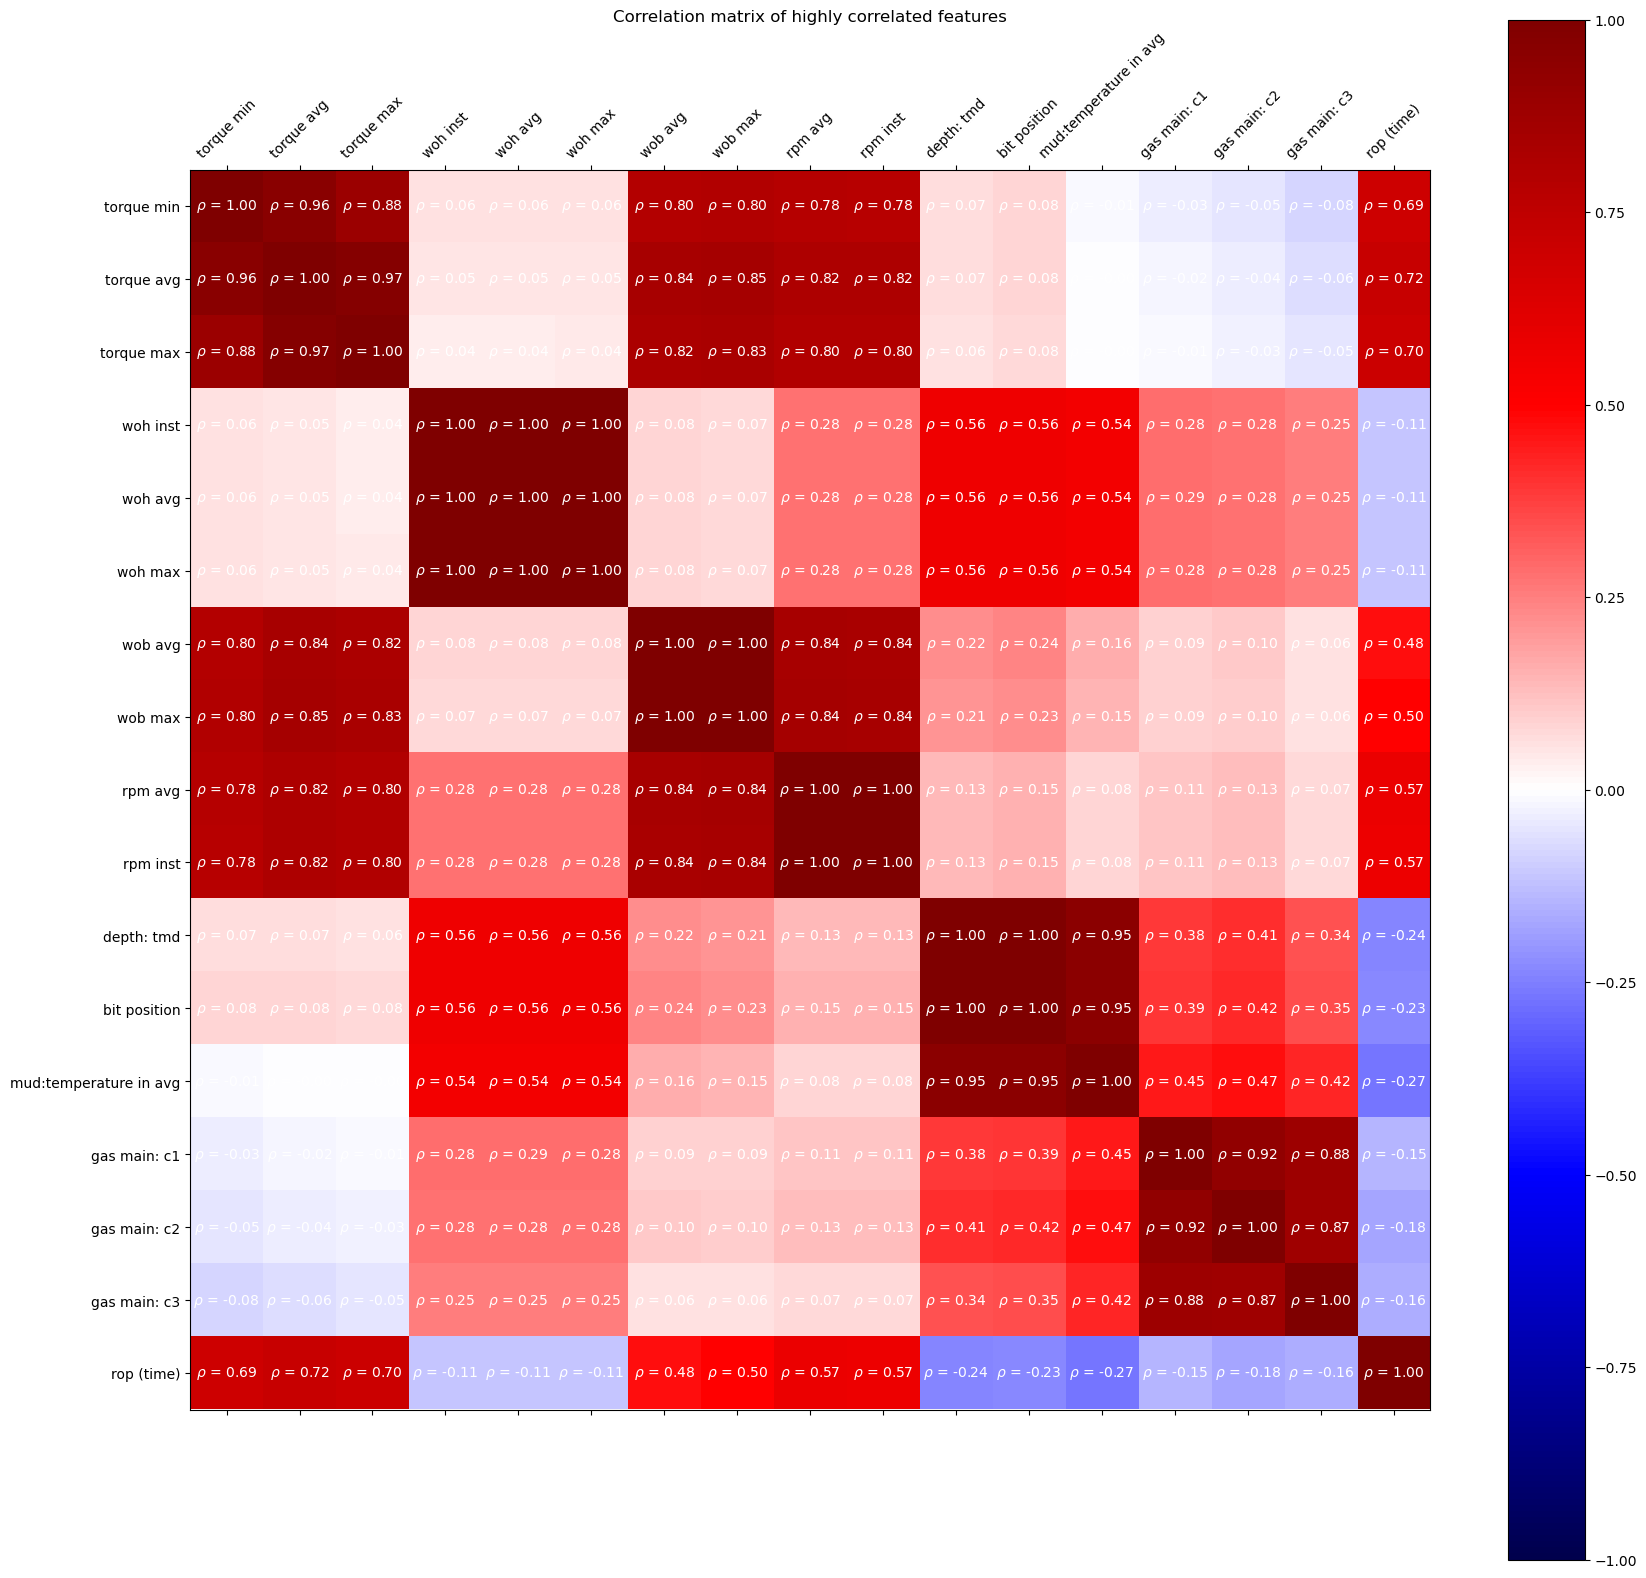

In [76]:
plot_correlation_matrix(df_multi_corr, 'Correlation matrix of highly correlated features', width=20, font_size=10)

In [189]:
def plot_subplots_correlation_matrices(data_frames, titles, width=5, font_size=7):
    fig = plt.figure(figsize=(3 * width, 2 * width))
    fig.suptitle("Correlation Matrices")

    gs = GridSpec(2, 3, figure=fig)
    ax_center = fig.add_subplot(gs[0, 1])

    for i, (title, data) in enumerate(zip(titles, data_frames)):
        if i == 0:
            ax = fig.add_subplot(gs[0, 0])
        elif i == 1:
            ax = fig.add_subplot(gs[0, 2])
        elif i == 2:
            ax = ax_center
        elif i == 3:
            ax = fig.add_subplot(gs[1, 0])
        elif i == 4:
            ax = fig.add_subplot(gs[1, 2])
        
        plot_correlation_matrix(data, title, width=width, font_size=font_size, ax=ax)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [190]:
torque_vars = df.loc[:, ['Torque Min','Torque Avg','Torque Max','ROP (Time)']]
torque_vars.describe()

Torque Min    Torque Avg    Torque Max    ROP (Time)
count  72000.000000  72000.000000  72000.000000  72000.000000
mean    4469.155319   5243.937319   6038.060653     14.127261
std     4792.767021   5312.148401   6105.059882     23.298594
min        0.000000      0.000000      0.000000      0.000000
25%      741.000000    866.000000    975.000000      0.000000
50%     1034.000000   1178.000000   1372.500000      0.000000
75%     9057.000000  10443.000000  12032.000000     23.000000
max    17779.000000  18011.000000  30249.000000    124.500000

In [191]:
woh_vars = df.loc[:, ['WOH Inst','WOH Avg','WOH Max','ROP (Time)']]
woh_vars.describe()

WOH Inst       WOH Avg       WOH Max    ROP (Time)
count  72000.000000  72000.000000  72000.000000  72000.000000
mean      85.192417     85.185958     85.824444     14.127261
std       24.780230     24.760144     24.687756     23.298594
min        0.000000      0.000000      0.000000      0.000000
25%       76.000000     76.000000     77.000000      0.000000
50%       92.000000     92.000000     92.000000      0.000000
75%      101.000000    101.000000    102.000000     23.000000
max      123.000000    123.000000    126.000000    124.500000

In [192]:
wob_vars = df.loc[:, ['WOB Avg','WOB Max','ROP (Time)']]
wob_vars.describe()

WOB Avg       WOB Max    ROP (Time)
count  72000.000000  72000.000000  72000.000000
mean       5.943347      6.257833     14.127261
std        7.290598      7.578881     23.298594
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%       12.000000     13.000000     23.000000
max       27.000000     29.000000    124.500000

In [193]:
rmp_vars = df.loc[:, ['RPM Avg','RPM Inst','ROP (Time)']]
rmp_vars.describe()

RPM Avg      RPM Inst    ROP (Time)
count  72000.000000  72000.000000  72000.000000
mean      96.470444     96.492931     14.127261
std       54.908627     55.031325     23.298594
min        0.000000      0.000000      0.000000
25%       63.000000     63.000000      0.000000
50%       82.000000     82.000000      0.000000
75%      151.000000    150.000000     23.000000
max      181.000000    195.000000    124.500000

In [194]:
depth_bit = df.loc[:, ['Depth: TMD','Bit Position','ROP (Time)']]
depth_bit.describe()

Depth: TMD  Bit Position    ROP (Time)
count  72000.000000  72000.000000  72000.000000
mean    1827.429382   1817.613518     14.127261
std      561.112596    557.255077     23.298594
min      740.320000    729.450000      0.000000
25%     1315.100000   1314.430000      0.000000
50%     1928.770000   1924.340000      0.000000
75%     2377.810000   2349.410000     23.000000
max     2474.020000   2474.020000    124.500000

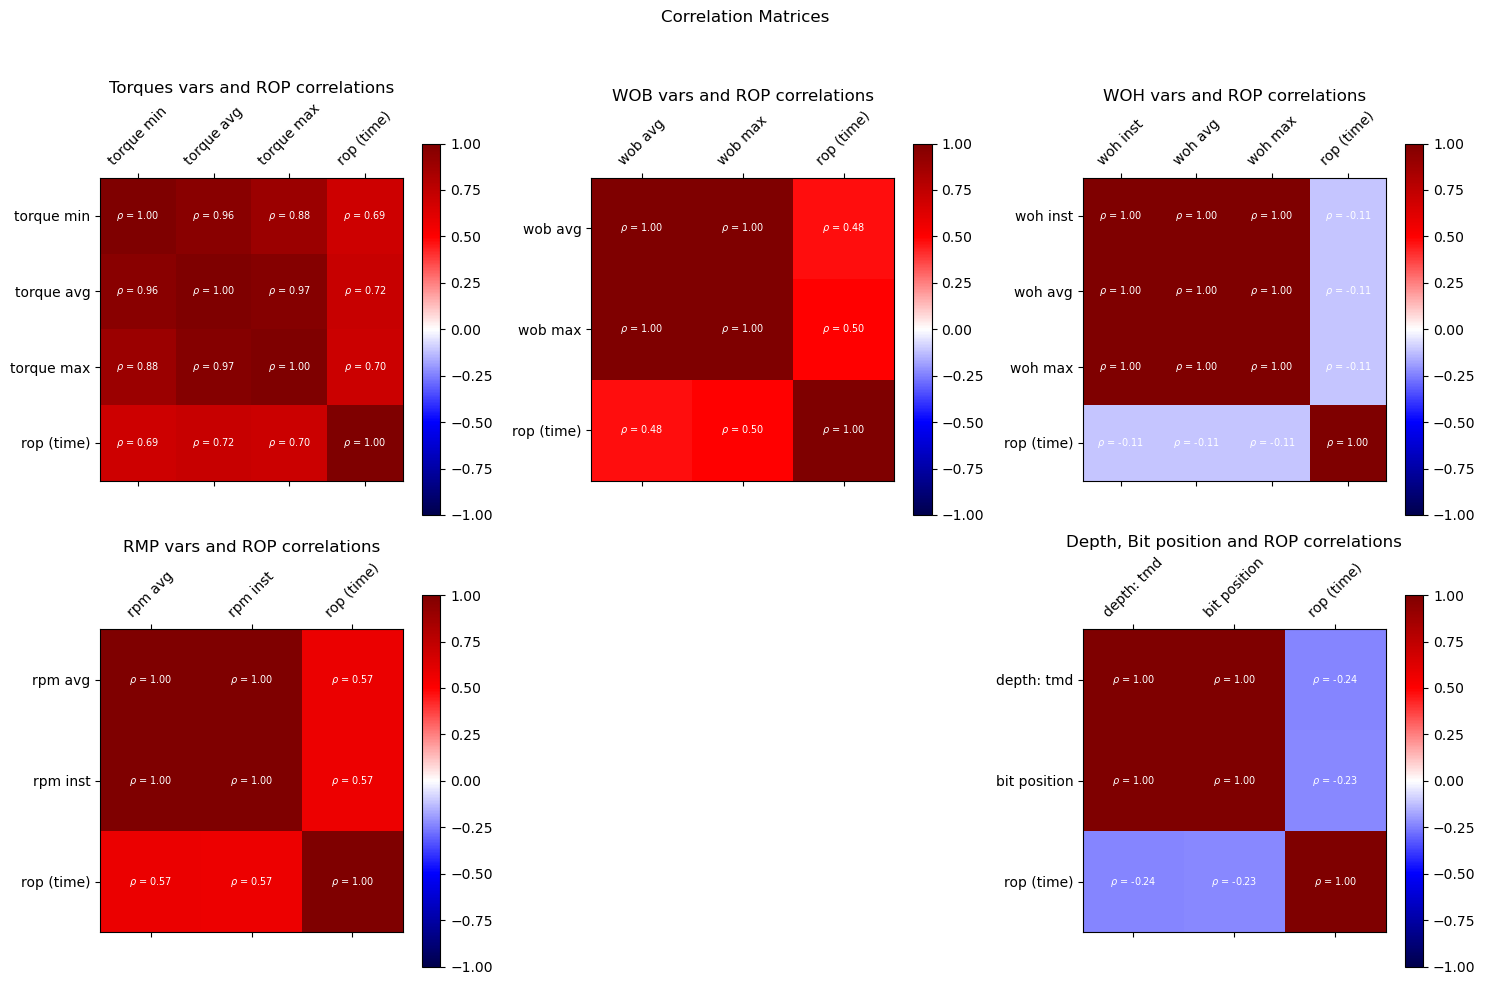

In [83]:
plot_subplots_correlation_matrices([torque_vars, woh_vars, wob_vars, rmp_vars, depth_bit],
                                   ['Torques vars and ROP correlations',
                                    'WOH vars and ROP correlations', 
                                    'WOB vars and ROP correlations',
                                    'RMP vars and ROP correlations', 
                                    'Depth, Bit position and ROP correlations'])

In [195]:
df.drop(['Torque Min', 'Torque Max', 'WOH Inst', 'WOH Max', 'WOB Avg', 'RPM Inst','Depth: TMD'], axis=1 , inplace=True)
df.describe()

Bit Position    Torque Avg       WOH Avg       WOB Max    ROP (Time)  \
count  72000.000000  72000.000000  72000.000000  72000.000000  72000.000000   
mean    1817.613518   5243.937319     85.185958      6.257833     14.127261   
std      557.255077   5312.148401     24.760144      7.578881     23.298594   
min      729.450000      0.000000      0.000000      0.000000      0.000000   
25%     1314.430000    866.000000     76.000000      0.000000      0.000000   
50%     1924.340000   1178.000000     92.000000      0.000000      0.000000   
75%     2349.410000  10443.000000    101.000000     13.000000     23.000000   
max     2474.020000  18011.000000    123.000000     29.000000    124.500000   

            RPM Avg  Flow In Pumps   Flow Paddle  Pressure: SPP Avg  \
count  72000.000000   72000.000000  72000.000000       72000.000000   
mean      96.470444    2501.576111     46.628764        2464.500306   
std       54.908627    1051.800740     16.298539         897.565938   
min        0.000000       0.000000      4.000000           0.000000   
25%       63.000000    2698.000000     50.000000        2300.000000   
50%       82.000000    2984.000000     52.000000        2855.000000   
75%      151.000000    3026.000000     55.000000        3061.000000   
max      181.000000   10000.000000     94.000000        3363.000000   

       Weight: Overpull Max  Weight: Drag Max  Hook Position  Mud: MWI Avg  \
count          72000.000000      72000.000000   72000.000000  72000.000000   
mean               0.158528          0.216931      16.611047      1.352066   
std                0.574878          1.783185       9.440172      0.014637   
min                0.000000          0.000000       0.570000      1.233000   
25%                0.000000          0.000000       8.210000      1.344000   
50%                0.000000          0.000000      17.110000      1.349000   
75%                0.000000          0.000000      24.950000      1.358000   
max               27.000000         83.000000      31.560000      1.407000   

       Mud: MWO Avg  Mud:Temperature IN Avg  Mud: Temperature OUT Avg  \
count  72000.000000            72000.000000              72000.000000   
mean       1.397834               46.396418                 46.082463   
std        0.078963                3.445177                 10.868619   
min        1.220000               37.700000                 20.700000   
25%        1.354000               43.900000                 36.100000   
50%        1.370500               46.900000                 48.500000   
75%        1.399000               48.500000                 53.200000   
max        1.664000               53.500000                113.000000   

       Pit 1 Volume  Pit 2 Volume  Pit 3 Volume  Pit 4 Volume  Pit 5 Volume  \
count  72000.000000  72000.000000  72000.000000  72000.000000  72000.000000   
mean       0.515447     19.586008     20.716156     20.801658     17.774992   
std        1.219228      4.735034      1.304481      1.474523      1.999399   
min        0.200000      0.000000     16.500000      0.000000     10.500000   
25%        0.200000     20.100000     19.800000     20.100000     16.600000   
50%        0.200000     21.300000     20.800000     21.000000     17.700000   
75%        0.200000     22.000000     21.800000     21.700000     18.900000   
max        8.300000     23.700000     23.300000     24.200000     23.700000   

       Pit 6 Volume  Gas Main: TG inst  Gas Main: C1  Gas Main: C2  \
count  72000.000000       72000.000000  72000.000000  72000.000000   
mean      19.536707           0.182188      0.011934      0.003911   
std        7.882599           0.233996      0.024506      0.009401   
min        6.800000           0.000000      0.000000      0.000000   
25%        8.800000           0.006200      0.000100      0.000000   
50%       23.000000           0.125700      0.002300      0.000300   
75%       26.700000           0.384500      0.012800      0.001900   
max       30.400000   

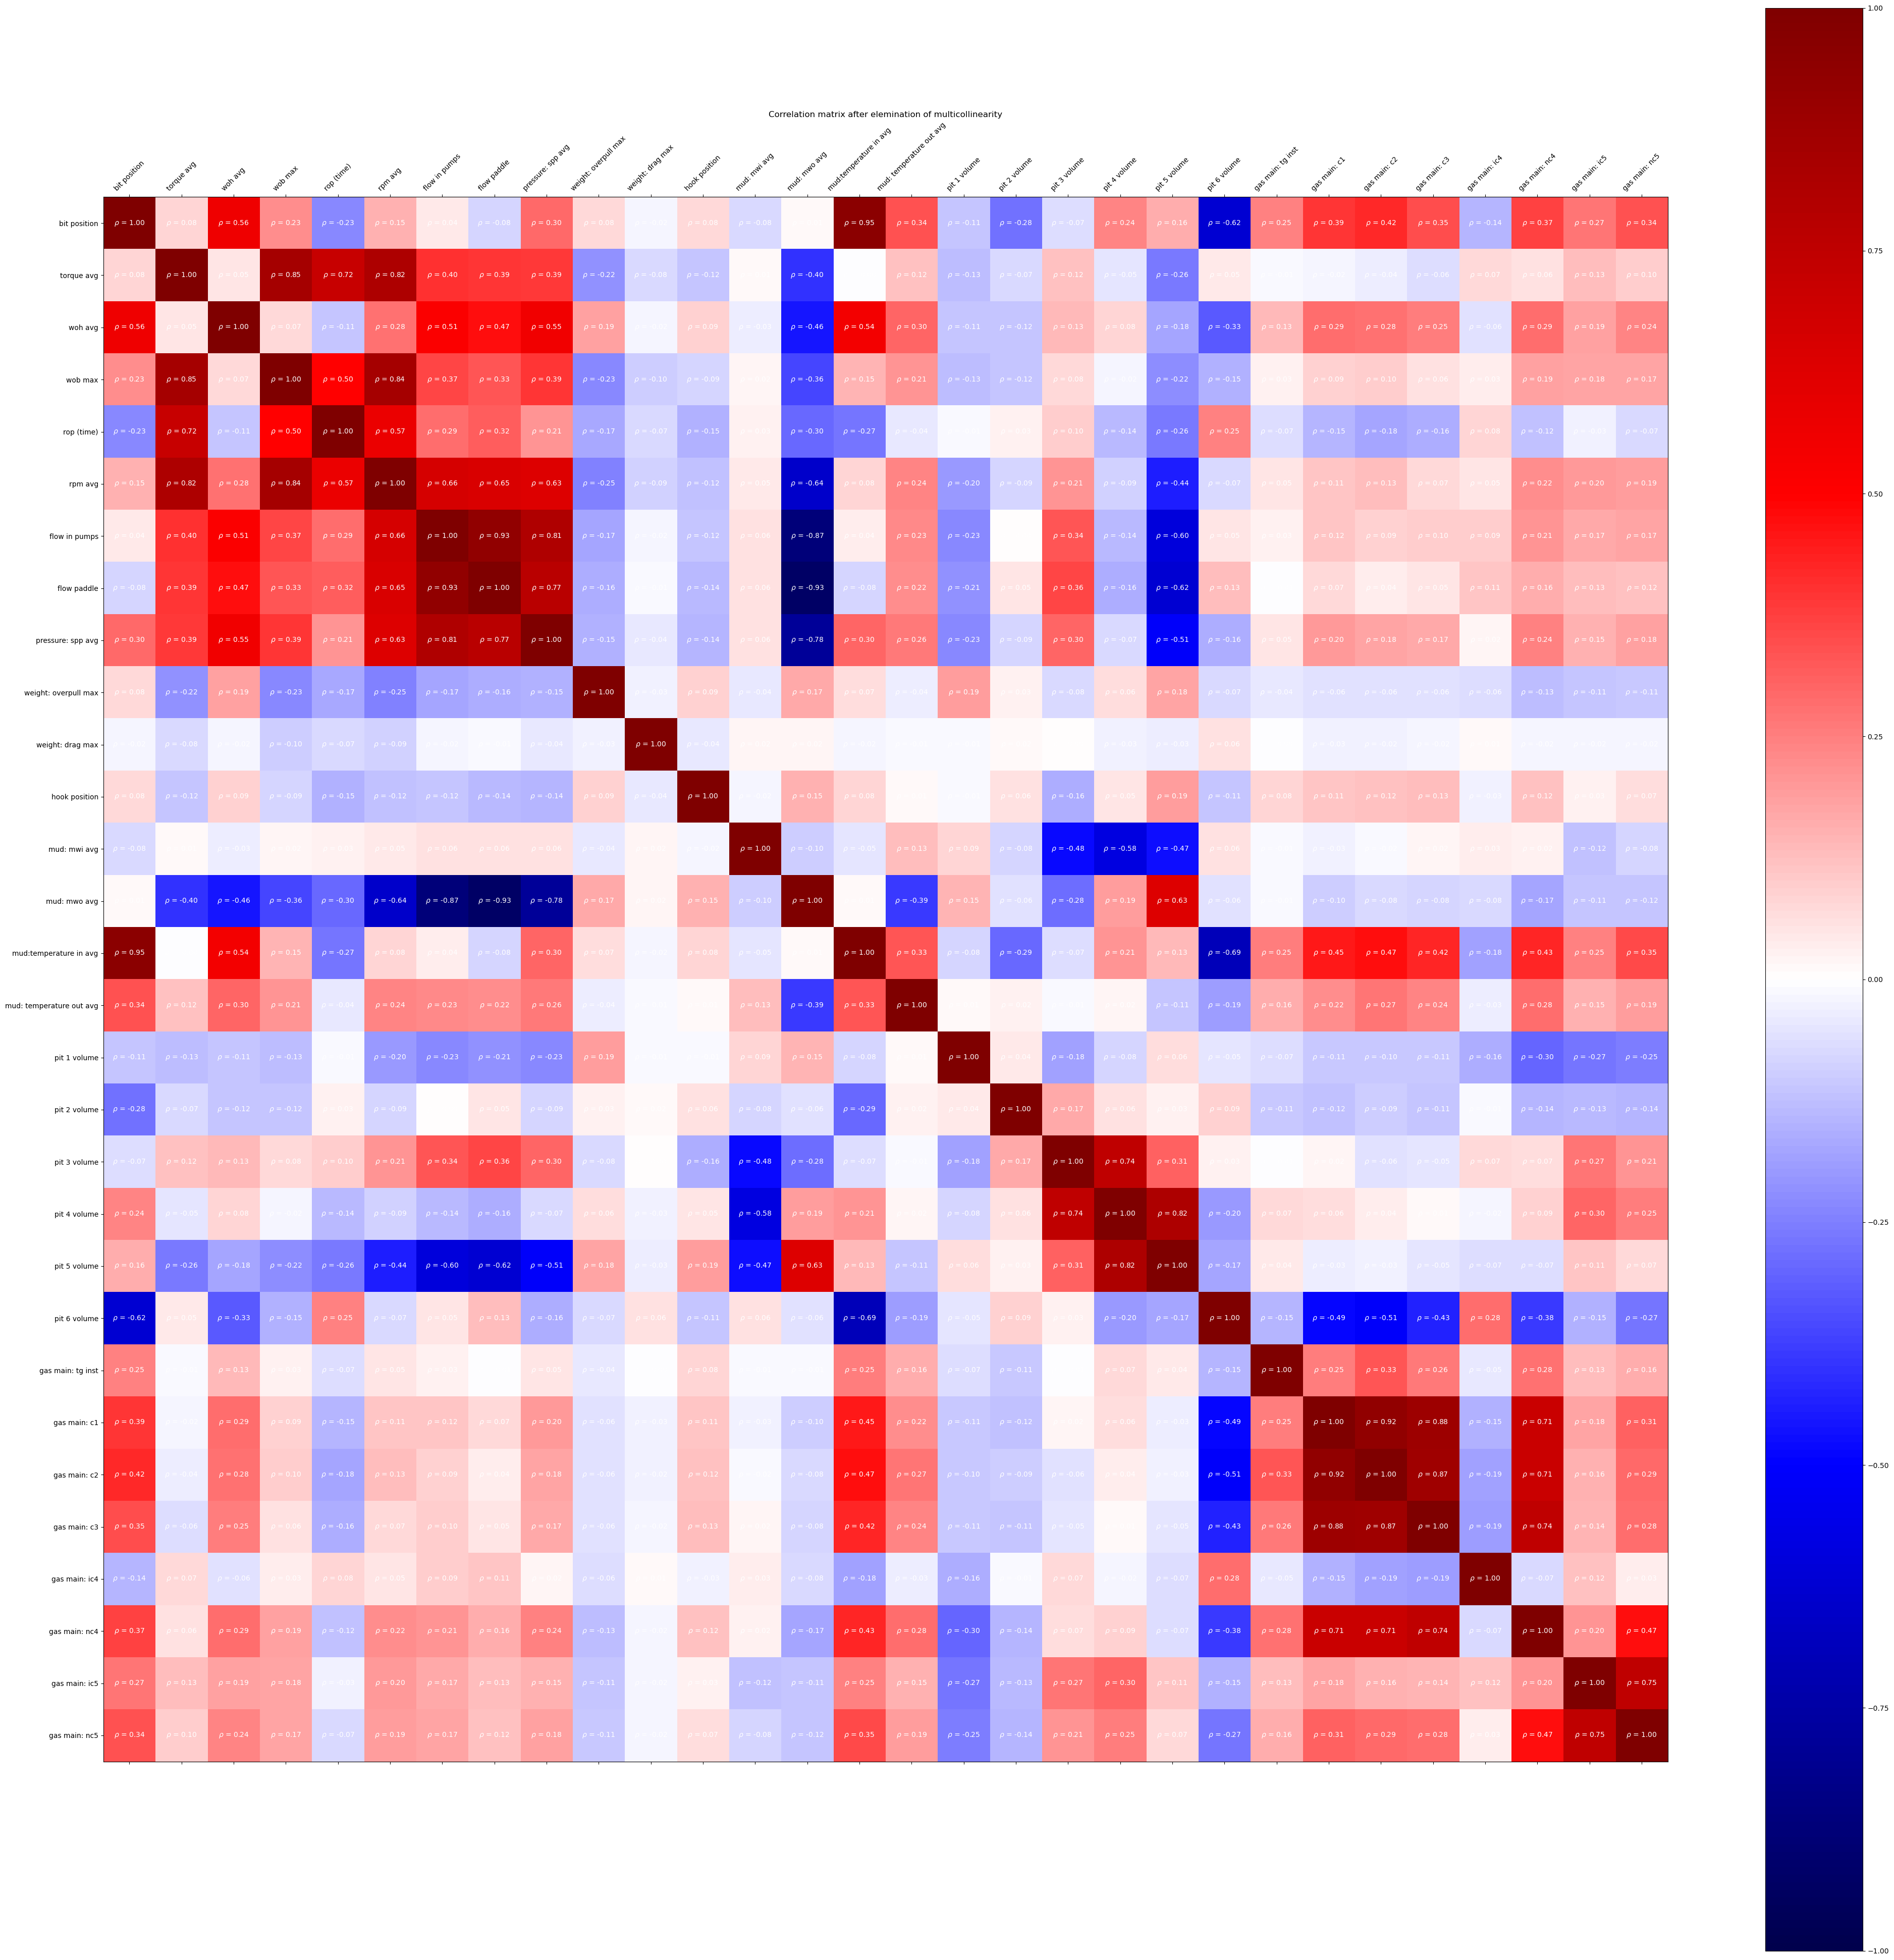

In [25]:
plot_correlation_matrix(df, 'Correlation matrix after elemination of multicollinearity', width=50, font_size=10)

In [196]:
def plot_correlation_with_target(df, target_column, min_positive_corr=0.5, min_negative_corr=-0.5):
    correlations = df.corr()[target_column].sort_values(by=target_column, ascending=False).drop(target_column)

    plt.figure(figsize=(8, 5))
    correlations.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.axhline(y=min_positive_corr, color='red', linestyle='--', label='min positive correlation for consideration')
    plt.axhline(y=min_negative_corr, color='blue', linestyle='--', label='min negative correlation for consideration')
    plt.title(f'Correlation with {target_column}')
    plt.xlabel('Features')
    plt.ylabel('Correlation')
    plt.legend()
    plt.show()

<Figure size 800x500 with 0 Axes>

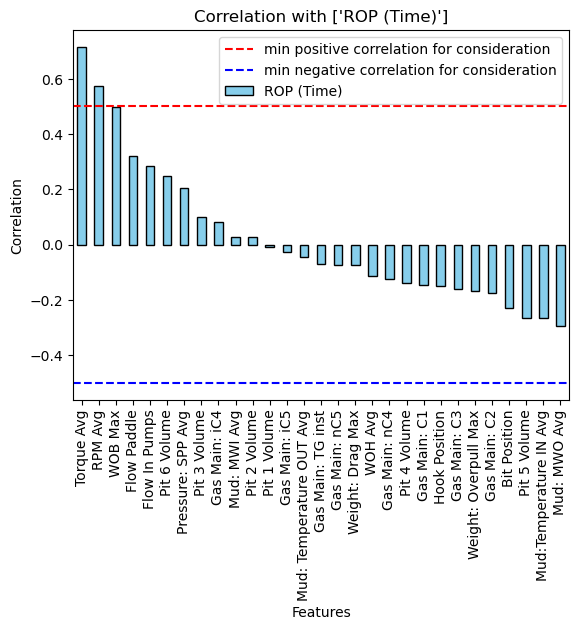

In [27]:
plot_correlation_with_target(df=df, target_column=['ROP (Time)'])

In [227]:
def explore_relationships(data, x_column, y_column):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    axes[0, 0].scatter(data[x_column], data[y_column], c='blue', alpha=0.5)
    axes[0, 0].set_xlabel(x_column)
    axes[0, 0].set_ylabel(y_column)
    axes[0, 0].set_title('Scatter Plot')

    axes[0, 1].scatter(np.log(data[x_column]), np.log(data[y_column]), c='green', alpha=0.5)
    axes[0, 1].set_xlabel(f'Log({x_column})')
    axes[0, 1].set_ylabel(f'Log({y_column})')
    axes[0, 1].set_title('Log-Log Plot')

    axes[1, 0].scatter(data[x_column], np.exp(data[y_column]), c='red', alpha=0.5)
    axes[1, 0].set_xlabel(x_column)
    axes[1, 0].set_ylabel(f'Exp({y_column})')
    axes[1, 0].set_title('Exponential Plot')

    axes[1, 1].hist(data[x_column], bins=20, color='purple', alpha=0.7, label=x_column)
    axes[1, 1].hist(data[y_column], bins=20, color='orange', alpha=0.7, label=y_column)
    axes[1, 1].set_xlabel('Value')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title('Histograms')
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()

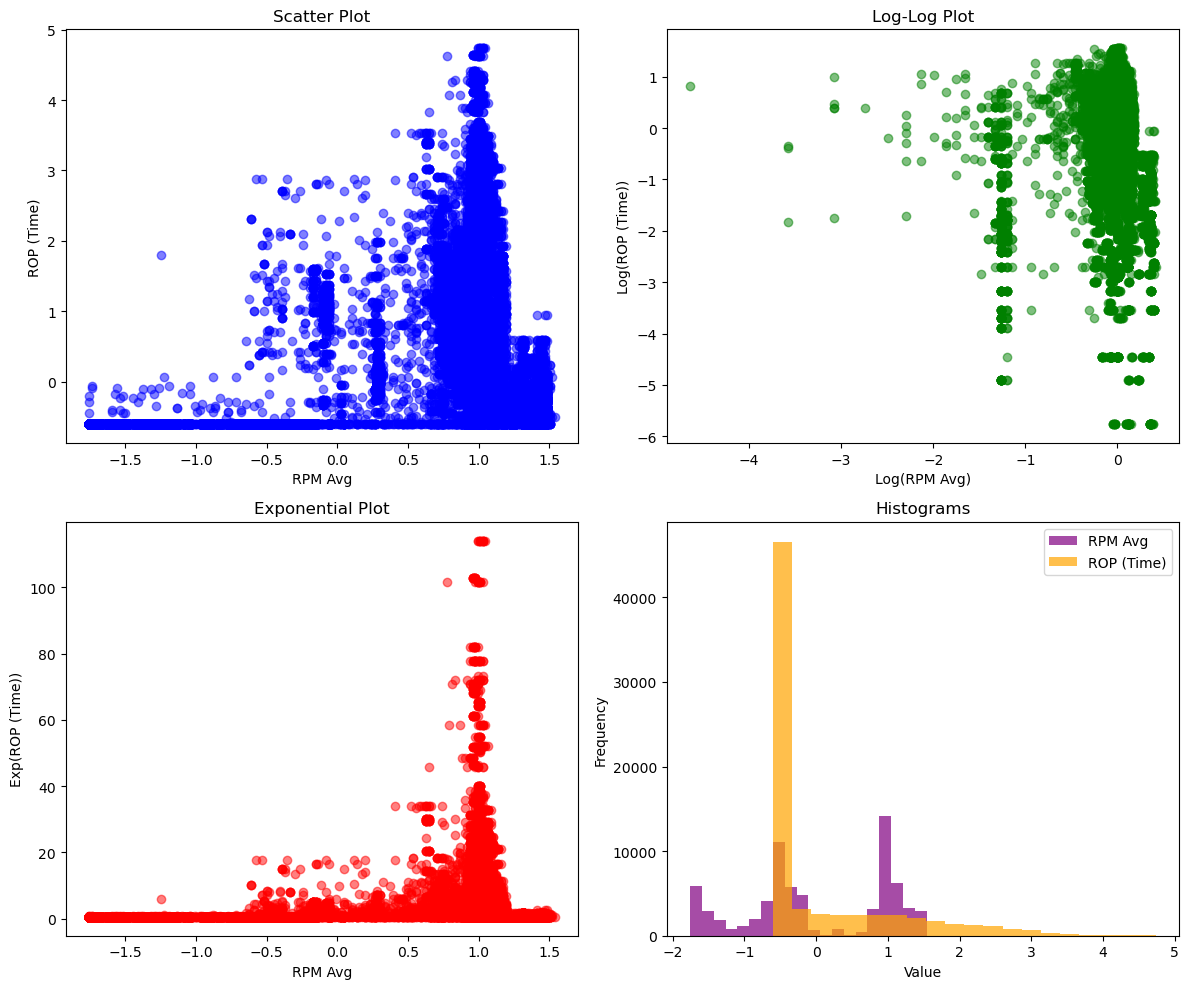

In [229]:
explore_relationships(df, x_column="RPM Avg", y_column="ROP (Time)")

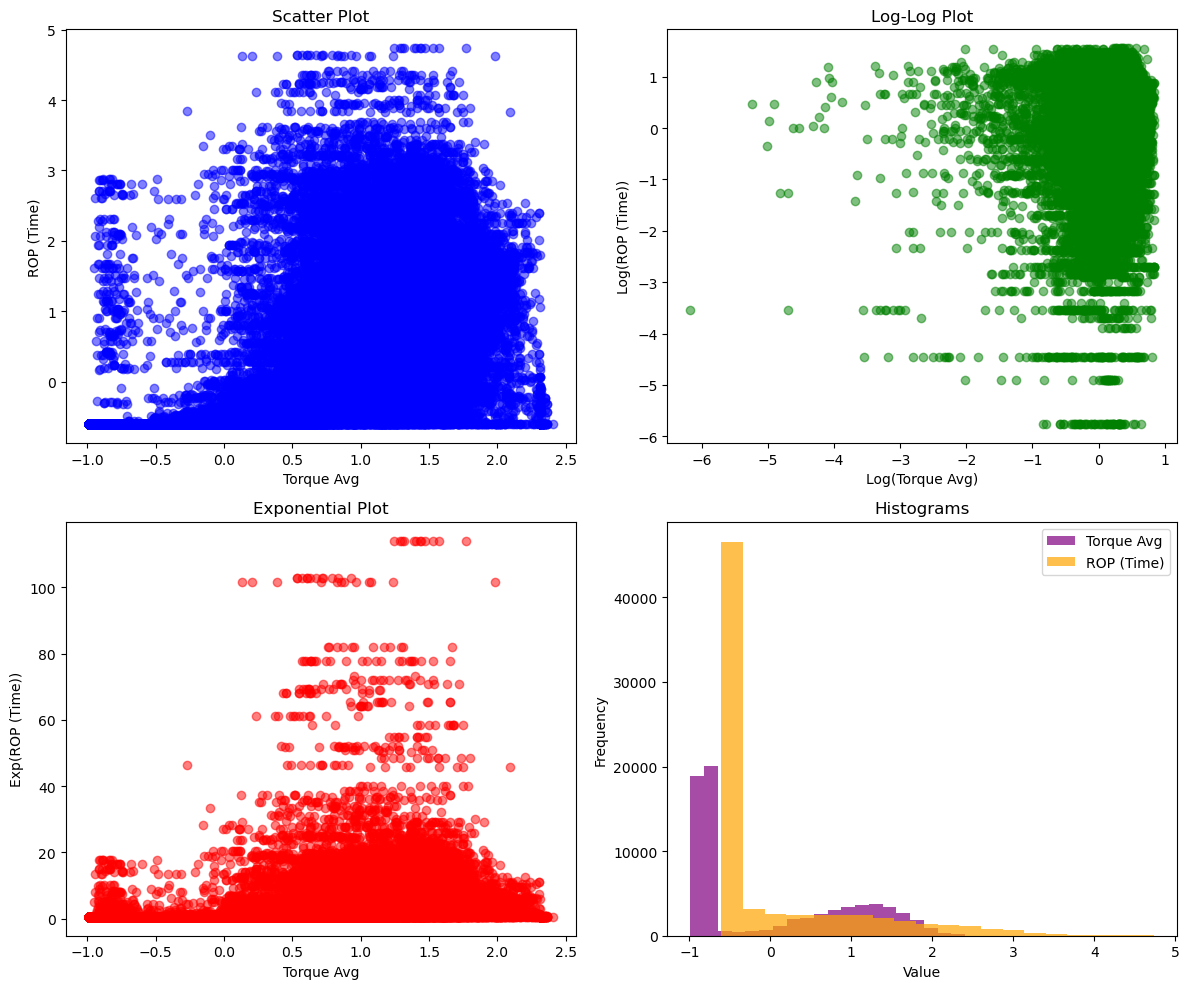

In [230]:
explore_relationships(df, x_column="Torque Avg", y_column="ROP (Time)")

> ## Exploratory data analysis

In [86]:
df

Bit Position  Torque Avg  WOH Avg  WOB Max  ROP (Time)  RPM Avg  \
0            730.01         0.0     20.0      0.0         0.0      0.0   
1            730.01         0.0     20.0      0.0         0.0      0.0   
2            730.01         0.0     20.0      0.0         0.0      0.0   
3            730.01         0.0     20.0      0.0         0.0      0.0   
4            730.01         0.0     20.0      0.0         0.0      0.0   
...             ...         ...      ...      ...         ...      ...   
71995       2187.66         0.0    109.0      0.0         0.0      0.0   
71996       2187.53         0.0    108.0      0.0         0.0      0.0   
71997       2187.34         0.0    108.0      0.0         0.0      0.0   
71998       2187.22         0.0    108.0      0.0         0.0      0.0   
71999       2187.06         0.0    108.0      0.0         0.0      0.0   

       Flow In Pumps  Flow Paddle  Pressure: SPP Avg  Weight: Overpull Max  \
0             1165.0         48.0             1530.0                   0.0   
1             1164.0         48.0             1529.0                   0.0   
2             1164.0         48.0             1526.0                   0.0   
3             1164.0         48.0             1530.0                   0.0   
4             1164.0         47.0             1530.0                   0.0   
...              ...          ...                ...                   ...   
71995            0.0          6.0              691.0                   0.0   
71996            0.0          6.0              691.0                   0.0   
71997            0.0          6.0              693.0                   0.0   
71998            0.0          6.0              694.0                   1.0   
71999            0.0          6.0              691.0                   0.0   

       Weight: Drag Max  Hook Position  Mud: MWI Avg  Mud: MWO Avg  \
0                   0.0           2.33         1.360         1.389   
1                   0.0           2.33         1.360         1.366   
2                   0.0           2.33         1.363         1.399   
3                   0.0           2.33         1.364         1.388   
4                   0.0           2.33         1.351         1.401   
...                 ...            ...           ...           ...   
71995               0.0          17.66         1.348         1.551   
71996               0.0          17.79         1.349         1.545   
71997               0.0          17.98         1.343         1.546   
71998               0.0          18.10         1.346         1.546   
71999               0.0          18.25         1.348         1.543   

       Mud:Temperature IN Avg  Mud: Temperature OUT Avg  Pit 1 Volume  \
0                        39.5                      34.5           0.6   
1                        39.5                      34.4           0.6   
2                        39.5                      34.4           0.6   
3                        39.5                      34.3           0.6   
4                        39.5                      34.3           0.6   
...                       ...                       ...           ...   
71995                    47.5                      34.1           5.8   
71996                    47.5                      34.0           5.8   
71997                    47.5                      34.0           5.8   
71998                    47.5                      34.0           5.8   
71999                    47.5                      34.0           5.8   

       Pit 2 Volume  Pit 3 Volume  Pit 4 Volume  Pit 5 Volume  Pit 6 Volume  \
0              20.9          20.2          20.7          18.7          27.1   
1              20.9          20.2          20.7          18.6          27.1   
2              20.9          20.2          20.7          18.6          27.1   
3              20.9          20.2          20.7          18.7          27.1   
4              21.0          20.3          20.7          18.7       

<IPython.core.display.Javascript object>


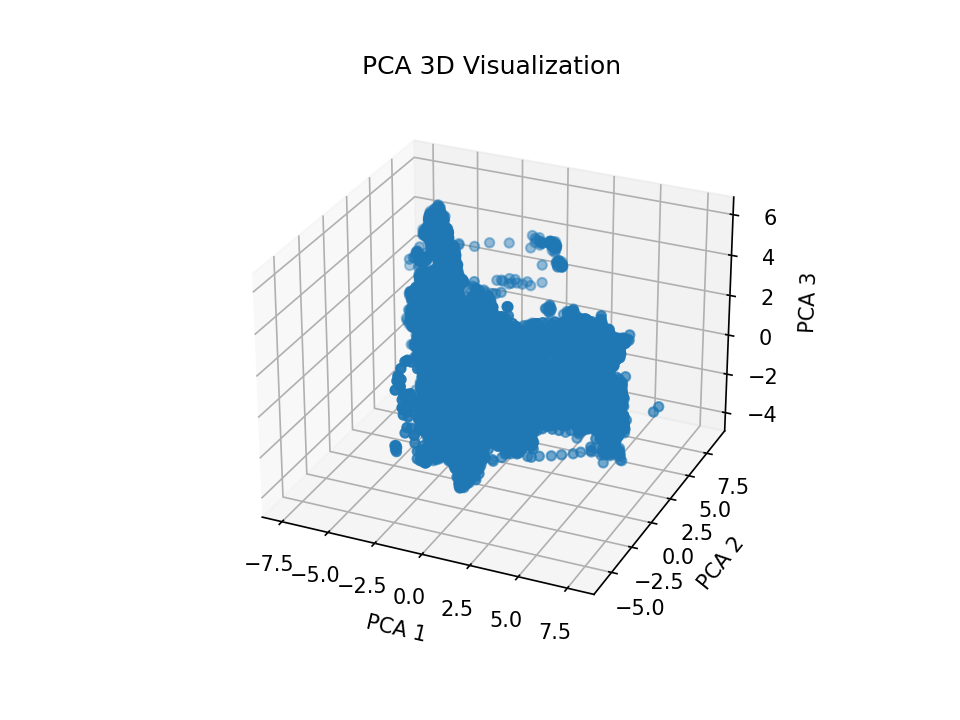

In [245]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

pca = PCA(n_components=3)
data_3d = pca.fit_transform(df)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2])

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('PCA 3D Visualization')

plt.show()

In [250]:
%matplotlib

Using matplotlib backend: nbAgg


In [ ]:
scaled_data = scaler.fit_transform(df)  
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
df  = scaled_df

In [220]:
def detect_multivariate_outliers(X, threshold=0.95, visualize=True):

    X_standardized = (X - X.mean()) / X.std()
    pca = PCA()
    principal_components = pca.fit_transform(X_standardized)
    mean = np.mean(principal_components, axis=0)
    cov_matrix = np.cov(principal_components, rowvar=False)
    mahalanobis_dist = [distance.mahalanobis(pc, mean, np.linalg.inv(cov_matrix)) for pc in principal_components]
    chi2_threshold = chi2.ppf(threshold, df=principal_components.shape[1])

    is_outlier = mahalanobis_dist > chi2_threshold

    if visualize:
        plt.figure(figsize=(8, 6))
        plt.scatter(range(len(mahalanobis_dist)), mahalanobis_dist, c='b', label='Mahalanobis Distance')
        plt.axhline(chi2_threshold, color='r', linestyle='dashed', linewidth=2, label=f'Chi-Squared Threshold ({threshold:.2f})')
        plt.title('Mahalanobis Distance vs. Data Points')
        plt.xlabel('Data Point Index')
        plt.ylabel('Mahalanobis Distance')
        plt.legend()
        plt.show()

    num_outliers = np.sum(is_outlier)
    percentage_outliers = (num_outliers / len(X)) * 100

    print(f'Number of outliers: {num_outliers}')
    print(f'Percentage of outliers: {percentage_outliers:.2f}%')

    return is_outlier

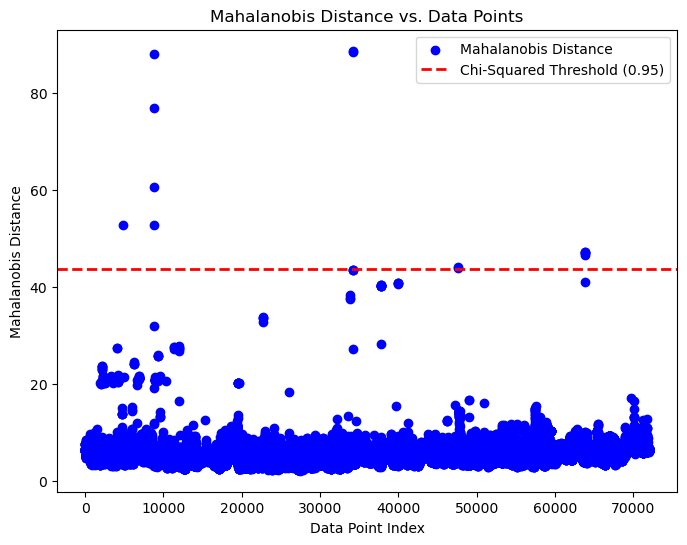

Number of outliers: 14
Percentage of outliers: 0.02%


array([False, False, False, ..., False, False, False])

In [221]:
detect_multivariate_outliers(df)

In [216]:
def detect_outliers_and_sort(data):
    columns = data.columns
    results = []

    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        num_outliers = len(outliers)
        num_total = len(data)
        percentage_outliers = (num_outliers / num_total) * 100

        results.append({
            'Column': column,
            'Q1': q1,
            'Q3': q3,
            'IQR': iqr,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Outlier Count': num_outliers,
            'Percentage Outliers': percentage_outliers
        })

    results_df = pd.DataFrame(results).sort_values(by='Percentage Outliers', ascending=False)
    return results_df

In [217]:
detect_outliers_and_sort(df)

Column        Q1        Q3       IQR  Lower Bound  \
6              Flow In Pumps  0.186751  0.498600  0.311848    -0.281021   
24              Gas Main: C2 -0.416036 -0.213921  0.202115    -0.719208   
7                Flow Paddle  0.206844  0.513622  0.306778    -0.253323   
13              Mud: MWO Avg -0.555133  0.014761  0.569894    -1.409974   
17              Pit 2 Volume  0.108552  0.509819  0.401267    -0.493349   
16              Pit 1 Volume -0.258729 -0.258729  0.000000    -0.258729   
25              Gas Main: C3 -0.397819 -0.166188  0.231631    -0.745265   
8          Pressure: SPP Avg -0.183275  0.664579  0.847854    -1.455057   
27             Gas Main: nC4 -0.528367  0.333390  0.861757    -1.821003   
9       Weight: Overpull Max -0.275761 -0.275761  0.000000    -0.275761   
23              Gas Main: C1 -0.482896  0.035341  0.518238    -1.260253   
2                    WOH Avg -0.371000  0.638694  1.009694    -1.885542   
10          Weight: Drag Max -0.121654 -0.121654  0.000000    -0.121654   
4                 ROP (Time) -0.606361  0.380830  0.987191    -2.087147   
12              Mud: MWI Avg -0.551066  0.405410  0.956476    -1.985780   
19              Pit 4 Volume -0.475858  0.609246  1.085104    -2.103514   
20              Pit 5 Volume -0.587676  0.562677  1.150354    -2.313207   
29             Gas Main: nC5 -0.676725  0.482161  1.158886    -2.415053   
28             Gas Main: iC5 -0.589230  0.543674  1.132905    -2.288588   
26             Gas Main: iC4 -0.904409  0.647928  1.552337    -3.232914   
22         Gas Main: TG inst -0.752103  0.864599  1.616702    -3.177157   
15  Mud: Temperature OUT Avg -0.918473  0.654875  1.573348    -3.278495   
18              Pit 3 Volume -0.702319  0.830868  1.533187    -3.002099   
21              Pit 6 Volume -1.362086  0.908754  2.270840    -4.768347   
1                 Torque Avg -0.824143  0.978719  1.802861    -3.528434   
14    Mud:Temperature IN Avg -0.724617  0.610592  1.335209    -2.727431   
11             Hook Position -0.889931  0.883354  1.773285    -3.549859   
5                    RPM Avg -0.609570  0.993103  1.602674    -3.013581   
3                    WOB Max -0.825699  0.889605  1.715305    -3.398657   
0               Bit Position -0.902974  0.954321  1.857295    -3.688917   

    Upper Bound  Outlier Count  Percentage Outliers  
6      0.966372          13354            18.547222  
24     0.089251          13349            18.540278  
7      0.973789          12127            16.843056  
13     0.869603          11427            15.870833  
17     1.111719          10516            14.605556  
16    -0.258729           9964            13.838889  
25     0.181258           9952            13.822222  
8      1.936361           9125            12.673611  
27     1.626026           8248            11.455556  
9     -0.275761           7109             9.873611  
23     0.812697           7080             9.833333  
2      2.153235           6366             8.841667  
10    -0.121654           6109             8.484722  
4      1.861616           5570             7.736111  
12     1.840124           4572             6.350000  
19     2.236903           2449             3.401389  
20     2.288207           2227             3.093056  
29     2.220489           2156             2.994444  
28     2.243031           1718             2.386111  
26     2.976433            299             0.415278  
22     3.289652            147             0.204167  
15     3.014897            146             0.202778  
18     3.130648             40             0.055556  
21     4.315015              0             0.000000  
1      3.683011              0             0.000000  
14     2.613405              0             0.000000  
11     3.543281              0             0.000000  
5      3.397114              0             0.000000  
3      3.462563              0             0.000000  
0      3.740264              0             0.000000

In [133]:
def get_distribution_type(series):
    if series.dtype == 'object':
        return 'Categorical'
    elif series.skew() > 1:
        return 'Highly Right-skewed'
    elif series.skew() < -1:
        return 'Highly Left-skewed'
    elif series.skew() > 0:
        return 'Right-skewed'
    elif series.skew() < 0:
        return 'Left-skewed'
    else:
        return 'Normally Distributed'

In [224]:
def plot_column_with_distribution_type(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers_iqr = (data[column] < lower_bound) | (data[column] > upper_bound)
    num_outliers_iqr = outliers_iqr.sum()
    num_total = len(data)
    percentage_outliers_iqr = (num_outliers_iqr / num_total) * 100

    df = data[column].values.reshape(-1, 1)

    dbscan = DBSCAN()
    labels = dbscan.fit_predict(df)
    outlier_index = np.where(labels == -1)[0]
    num_outliers_dbscan = len(outlier_index)
    num_total = len(data)
    percentage_outliers_dbscan = (num_outliers_dbscan / num_total) * 100

    distribution_type = get_distribution_type(data[column])

    plt.figure(figsize=(14, 20))
    gs = gridspec.GridSpec(4, 2, width_ratios=[2, 2])

    plt.subplot(gs[0])
    sns.histplot(data[column], bins=20, color='skyblue', kde=True)
    plt.axvline(q1, color='orange', linestyle='dashed', linewidth=2, label=f'Q1: {q1:.5f}')
    plt.axvline(q3, color='purple', linestyle='dashed', linewidth=2, label=f'Q3: {q3:.5f}')
    plt.axvline(lower_bound, color='gray', linestyle='dashed', linewidth=2, label=f'Lower Bound: {lower_bound:.5f}')
    plt.axvline(upper_bound, color='gray', linestyle='dashed', linewidth=2, label=f'Upper Bound: {upper_bound:.5f}')
    plt.title(f'Distribution of {column} ({distribution_type})')
    plt.legend()

    plt.subplot(gs[1])
    sns.violinplot(x=data[column], color='lightcoral')
    plt.title(f'Violin Plot of {column}')

    plt.subplot(gs[2])
    sns.boxplot(data[column], orient='h')
    plt.text(q1, 0.05, f'Q1: {q1:.5f}', fontsize=12, color='orange', rotation=45)
    plt.text(q3, 0.05, f'Q3: {q3:.5f}', fontsize=12, color='orange', rotation=45)
    plt.text(q1 + 0.35 * iqr, 0.1, f'IQR: {iqr:.5f}', fontsize=12, color='orange', rotation=45)
    plt.title(f'Outliers in {column}')
    plt.xlabel(f'Num outliers (IQR): {num_outliers_iqr}')

    plt.subplot(gs[3])
    probplot(data[column], plot=plt)
    
    ax = plt.subplot(gs[4:6])
    sns.scatterplot(x=data.index[~outliers_iqr], y=data[column][~outliers_iqr], color='blue', label='Data')
    sns.scatterplot(x=data.index[outliers_iqr], y=data[column][outliers_iqr], color='red', label='Outliers (IQR)')
    plt.axhline(lower_bound, color='gray', linestyle='dashed', linewidth=2, label='Lower Bound (IQR)')
    plt.axhline(upper_bound, color='gray', linestyle='dashed', linewidth=2, label='Upper Bound (IQR)')
    plt.title(f'Scatter Plot of {column} with Outliers (IQR)')
    plt.legend()

    ax = plt.subplot(gs[6:8])
    unique_labels = np.unique(labels)
    cluster_sizes = [np.sum(labels == label) for label in unique_labels]
    x = np.arange(len(data))  # Use index as x-axis
    for label, size in zip(unique_labels, cluster_sizes):
        if label == -1:
            continue
        cluster_points = df[labels == label]
        ax.scatter(x[labels == label], cluster_points, label=f'Cluster {label} ({size} samples)')
    ax.scatter(x[outlier_index], df[outlier_index], c='red', marker='x', label='Outliers (DBSCAN)')
    ax.set_title('DBSCAN Clustering and Outliers')
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Feature Value')
    ax.legend()

    plt.show()

    result_df = pd.DataFrame({
        'Column': [column],
        'Outlier Count (IQR)': [num_outliers_iqr],
        'Percentage Outliers (IQR)': [percentage_outliers_iqr],
        'Outlier Count (DBSCAN)': [num_outliers_dbscan],
        'Percentage Outliers (DBSCAN)': [percentage_outliers_dbscan],
    })

    return result_df, outliers_iqr, outlier_index

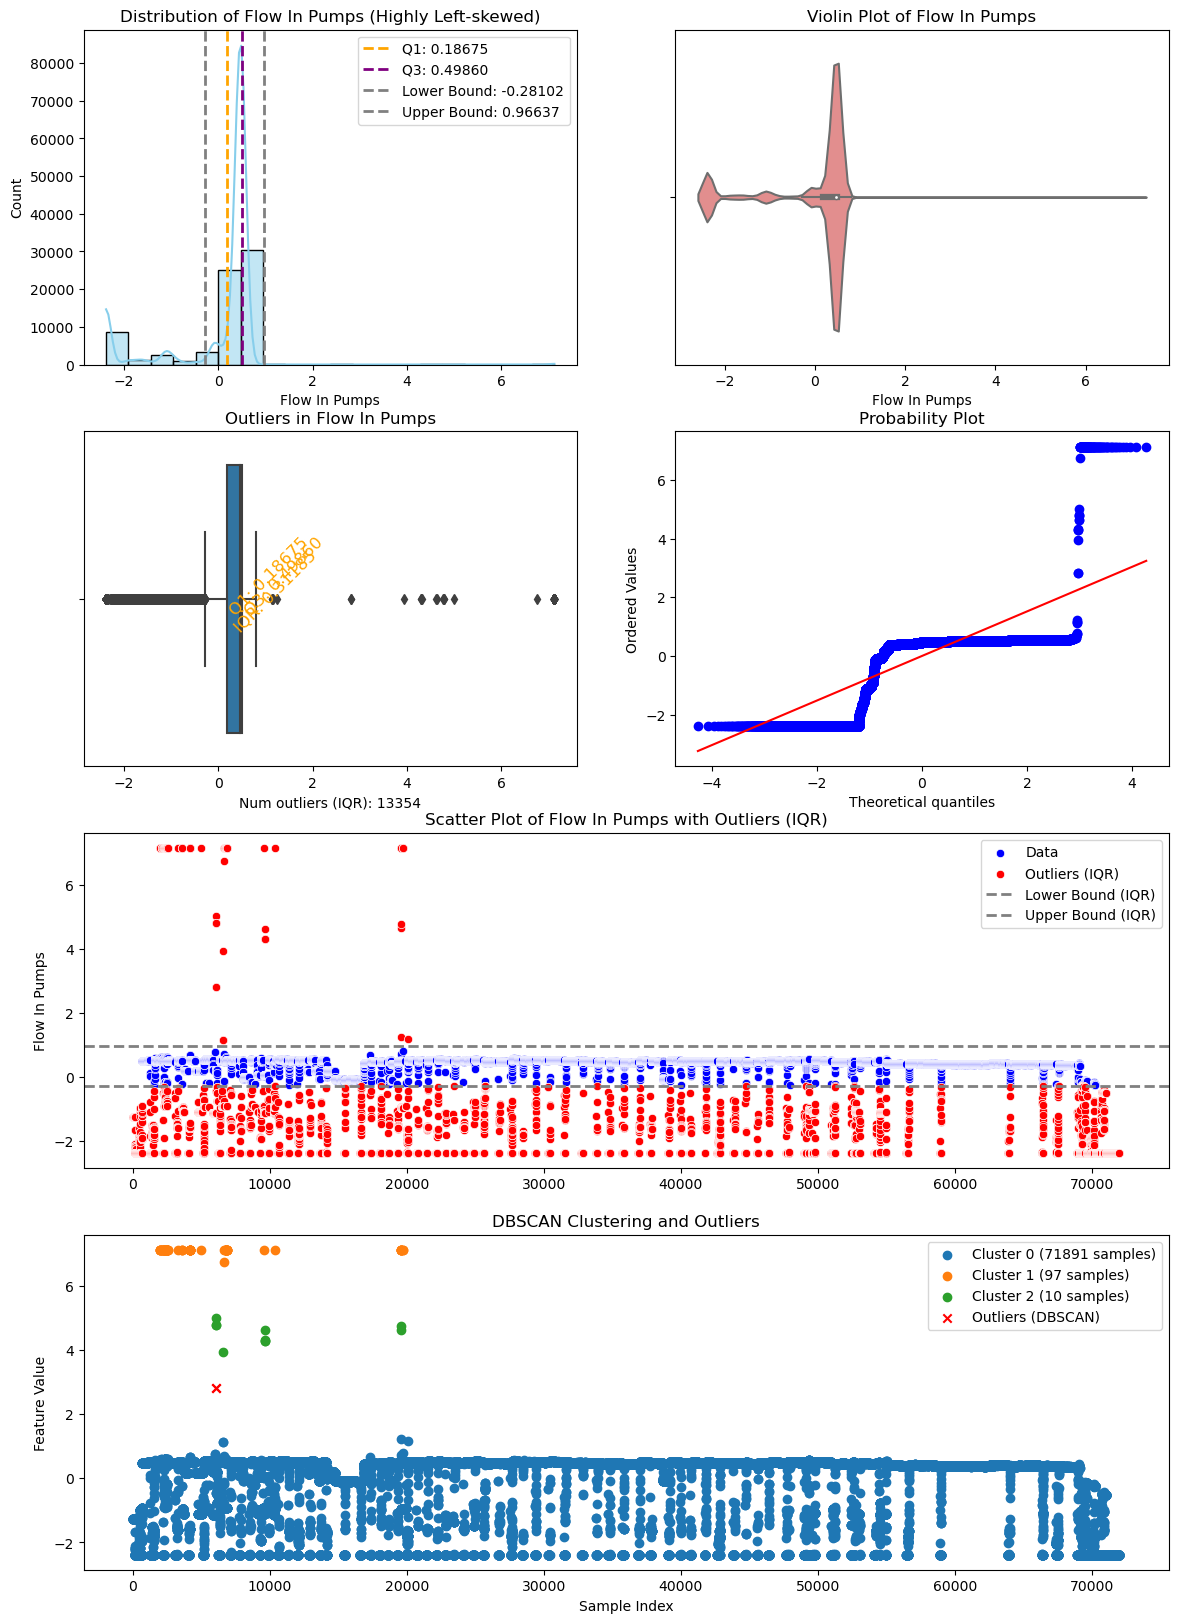

In [231]:
result_df, outliers_iqr, outlier_index = plot_column_with_distribution_type(df, 'Flow In Pumps')

> ## Features selection

**In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['ROP (Time)'], axis=1), df['ROP (Time)'], test_size=0.2, random_state=42)
((X_train.shape, y_train.shape), (X_test.shape, y_test.shape))

(((57600, 29), (57600,)), ((14400, 29), (14400,)))

### 1. Mutual information

In [36]:
def plot_mutual_information(X_train, y_train):
    mi = mutual_info_regression(X_train, y_train)
    mi_df = pd.DataFrame({'Feature': X_train.columns, 'Mutual Information': mi})
    mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Mutual Information', y='Feature', data=mi_df)
    plt.title('Mutual Information between Features and Target Variable')
    plt.xlabel('Mutual Information')
    plt.ylabel('Feature')
    plt.show()

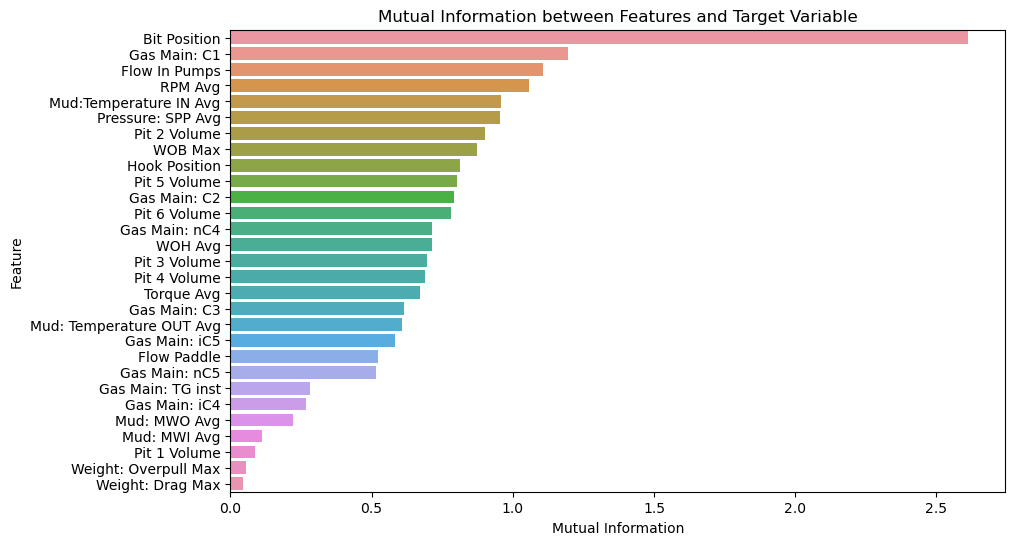

In [37]:
plot_mutual_information(X_train, y_train)

In [38]:
sel_ = SelectPercentile(mutual_info_regression, percentile=80).fit(X_train, y_train)

In [39]:
X_train.columns[sel_.get_support()]

Index(['Bit Position', 'Torque Avg', 'WOH Avg', 'WOB Max', 'RPM Avg',
       'Flow In Pumps', 'Flow Paddle', 'Pressure: SPP Avg', 'Hook Position',
       'Mud:Temperature IN Avg', 'Mud: Temperature OUT Avg', 'Pit 2 Volume',
       'Pit 3 Volume', 'Pit 4 Volume', 'Pit 5 Volume', 'Pit 6 Volume',
       'Gas Main: TG inst', 'Gas Main: C1', 'Gas Main: C2', 'Gas Main: C3',
       'Gas Main: nC4', 'Gas Main: iC5', 'Gas Main: nC5'],
      dtype='object')

In [40]:
X_train = X_train.loc[:,X_train.columns[sel_.get_support()]]
(X_train.shape)

(57600, 23)

### 2. ANOVA

In [42]:
def plot_univariate_analysis(X_train, y_train):
    f_values, p_values = f_regression(X_train, y_train)

    univariate = pd.DataFrame({'Feature': X_train.columns, 'F-Value': f_values, 'P-Value': p_values})
    univariate.set_index('Feature', inplace=True)

    univariate.sort_values(by='F-Value', ascending=False, inplace=True)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))

    sns.barplot(x=univariate['F-Value'], y=univariate.index, color='blue', ax=ax1)
    ax1.set_title('Feature Importance (F-Value) in Univariate Analysis')
    ax1.set_xlabel('F-Value')
    ax1.set_ylabel('Feature')

    sns.barplot(x=univariate['P-Value'], y=univariate.index, color='red', ax=ax2)
    ax2.set_title('P-Values in Univariate Analysis')
    ax2.set_xlabel('P-Value')
    ax2.set_ylabel('Feature')

    plt.tight_layout()
    plt.show()

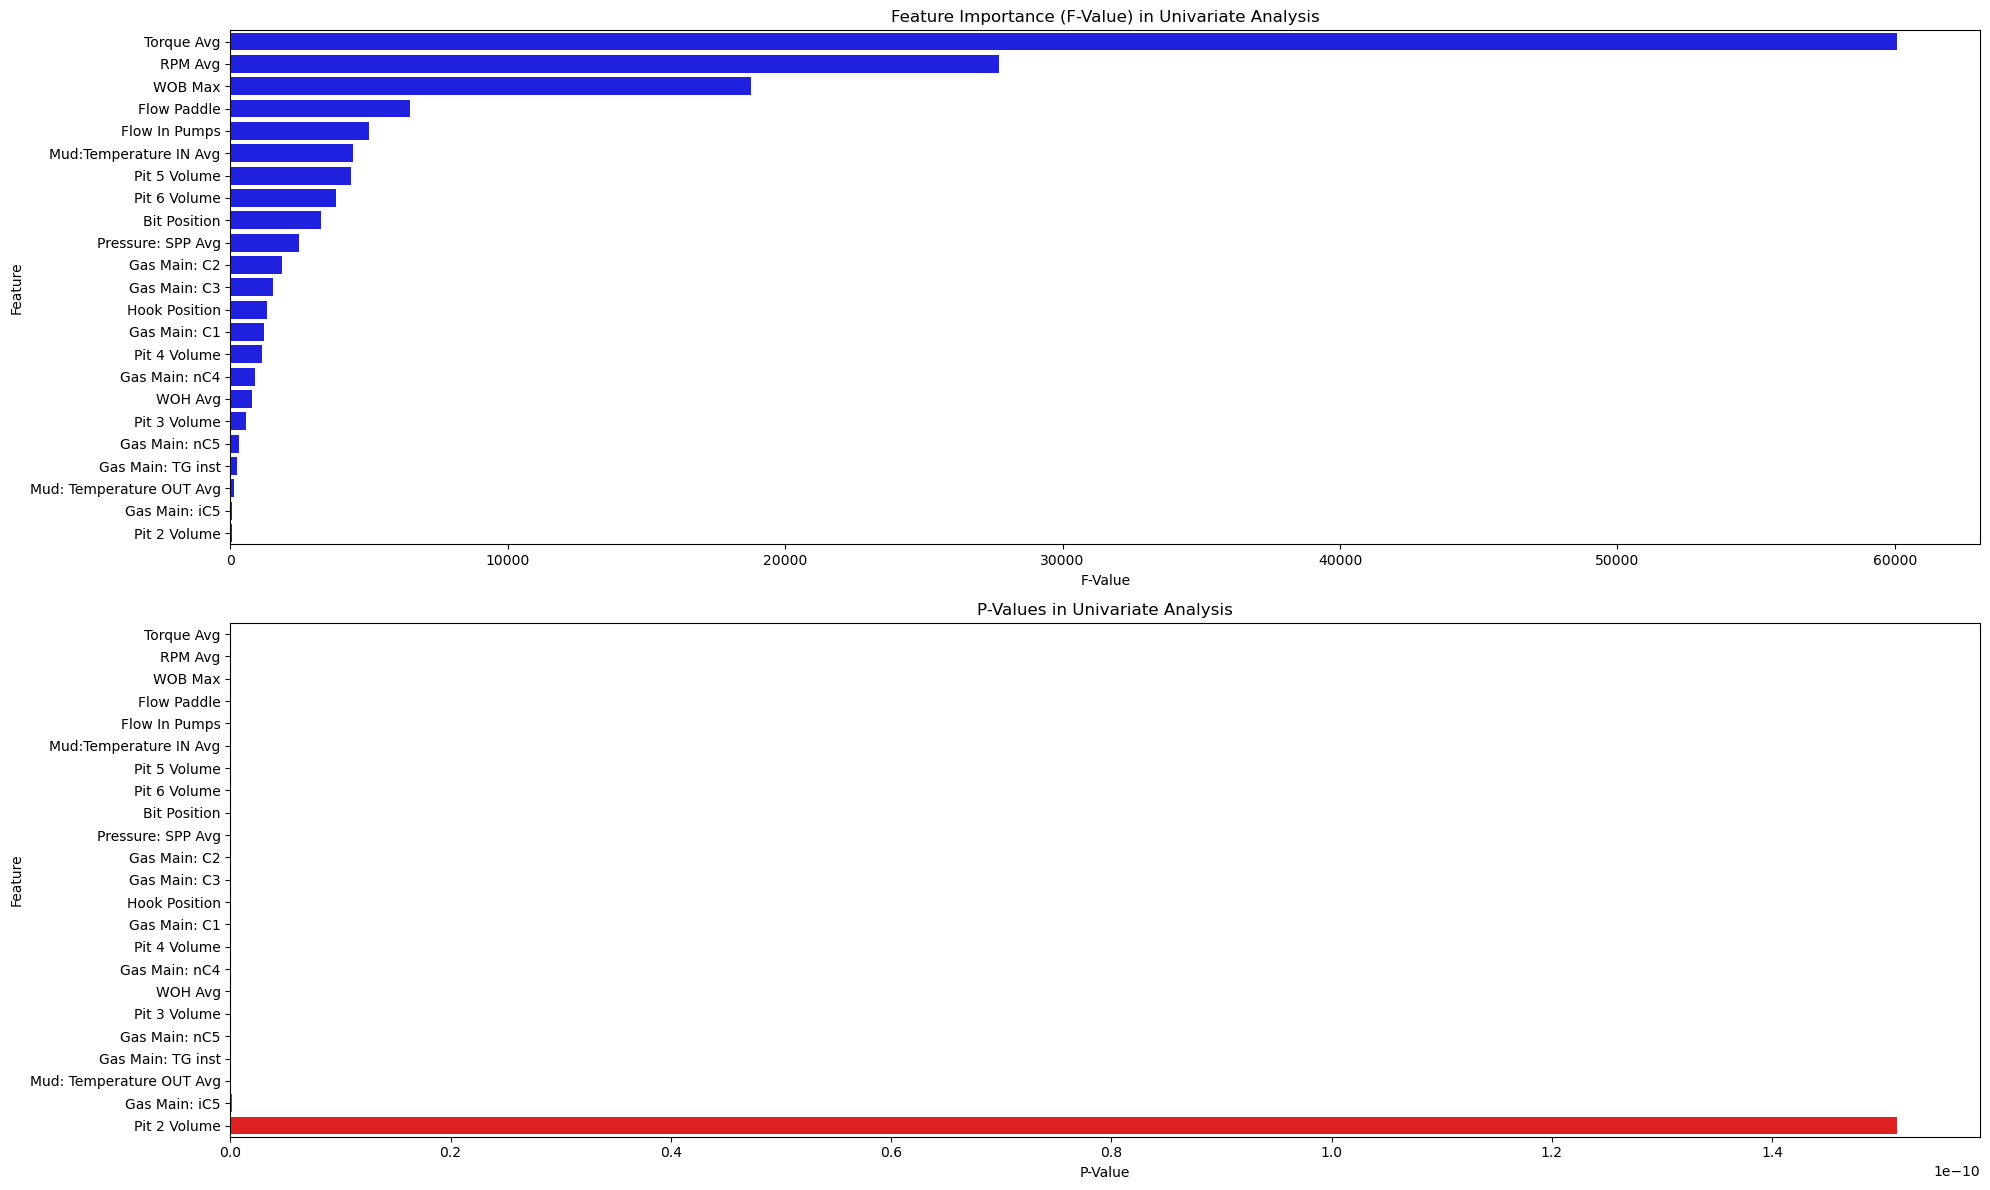

In [43]:
plot_univariate_analysis(X_train, y_train)

### 3. Using Decision tree

<IPython.core.display.Javascript object>


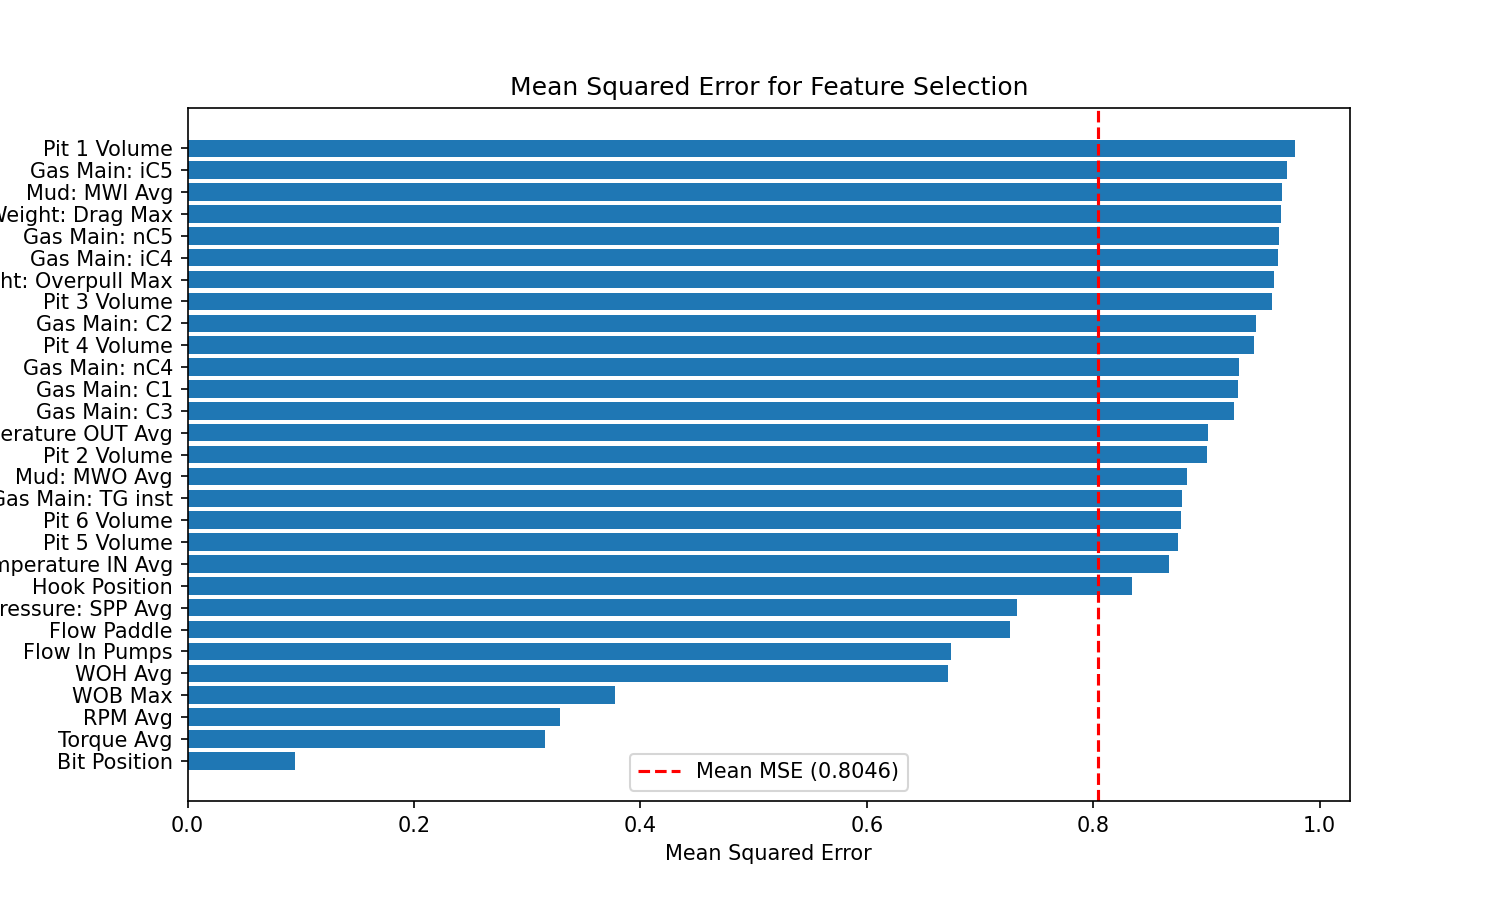

Selected Features: ['Bit Position', 'Torque Avg', 'RPM Avg', 'WOB Max', 'WOH Avg', 'Flow In Pumps', 'Flow Paddle', 'Pressure: SPP Avg']


In [251]:
def feature_selection_with_decision_tree_regression(df, target_column):
    mse_values = []
    selected_features = []

    for column in df.columns:
        if column == target_column:
            continue  
        X = df[[column]]
        y = df[target_column]
    
        model = DecisionTreeRegressor()
        model.fit(X, y)
        y_pred = model.predict(X)
        
        mse = mean_squared_error(y, y_pred)
        mse_values.append(mse)
        selected_features.append(column)

    mean_mse = np.mean(mse_values)
    mse_df = pd.DataFrame({'Feature': selected_features, 'MSE': mse_values})
    mse_df = mse_df.sort_values(by='MSE')
    
    plt.figure(figsize=(10, 6))
    plt.barh(mse_df['Feature'], mse_df['MSE'])
    plt.axvline(mean_mse, color='red', linestyle='--', label=f'Mean MSE ({mean_mse:.4f})')
    plt.xlabel('Mean Squared Error')
    plt.title('Mean Squared Error for Feature Selection')
    plt.legend()
    plt.show()
    
    selected_features = mse_df[mse_df['MSE'] < mean_mse]['Feature'].tolist()
    
    return selected_features, mse_df

selected_features, mse_df = feature_selection_with_decision_tree_regression(df, 'ROP (Time)')
print("Selected Features:", selected_features)

In [280]:
X = df.loc[:, ['Bit Position', 'Torque Avg', 'RPM Avg', 'WOB Max', 'WOH Avg', 'Flow In Pumps', 'Flow Paddle', 'Pressure: SPP Avg']]
y = df['ROP (Time)']

regressor = DecisionTreeRegressor() 
regressor.fit(X, y)
y_pred = regressor.predict(X)

mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

max_depth = regressor.get_depth()
print(f'Max Depth of the Tree: {max_depth}')

n_leaves = regressor.get_n_leaves()
print(f'Number of Leaves: {n_leaves}')

Mean Squared Error: 7.011963611607802e-26
Max Depth of the Tree: 39
Number of Leaves: 10355


In [284]:
regressor = DecisionTreeRegressor()

scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores

print("Mean Squared Error for Each Fold:")
for i, mse in enumerate(mse_scores):
    print(f"Fold {i+1}: {mse:.2f}")

average_mse = mse_scores.mean()
print(f"Average Mean Squared Error: {average_mse:.2f}")

Mean Squared Error for Each Fold:
Fold 1: 1.10
Fold 2: 0.66
Fold 3: 0.58
Fold 4: 0.25
Fold 5: 0.11
Average Mean Squared Error: 0.54


### 4. Using Lasso regression

In [325]:
def feature_selection_with_lasso(dataset, target_column, alphas=None):
    
    X = dataset.drop(columns=[target_column])
    y = dataset[target_column]

    if alphas is None:
        alphas = np.logspace(-4, 4, 100)

    mse_values = []

    for alpha in alphas:
        lasso = Lasso(alpha=alpha)
        lasso.fit(X, y)
        y_pred = lasso.predict(X)
        mse = mean_squared_error(y, y_pred)
        mse_values.append(mse)

    optimal_alpha = alphas[np.argmin(mse_values)]
    best_mse = min(mse_values)

    print(f'Optimal Alpha: {optimal_alpha}')
    print(f'Best Mean Squared Error: {best_mse}')

    plt.figure(figsize=(10, 6))
    plt.semilogx(alphas, mse_values, marker='o')
    plt.title('Alpha vs. Mean Squared Error')
    plt.xlabel('Alpha (log scale)')
    plt.ylabel('Mean Squared Error')
    plt.grid(True)

    lasso = Lasso(alpha=optimal_alpha)
    lasso.fit(X, y)
    nonzero_features = X.columns[lasso.coef_ != 0]

    coefficients_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': lasso.coef_
    })

    results_df = pd.DataFrame({
        'Optimal Alpha': [optimal_alpha],
        'Best Mean Squared Error': [best_mse]
    })

    return results_df, coefficients_df

Optimal Alpha: 0.0001
Best Mean Squared Error: 0.34899963178450083


<IPython.core.display.Javascript object>


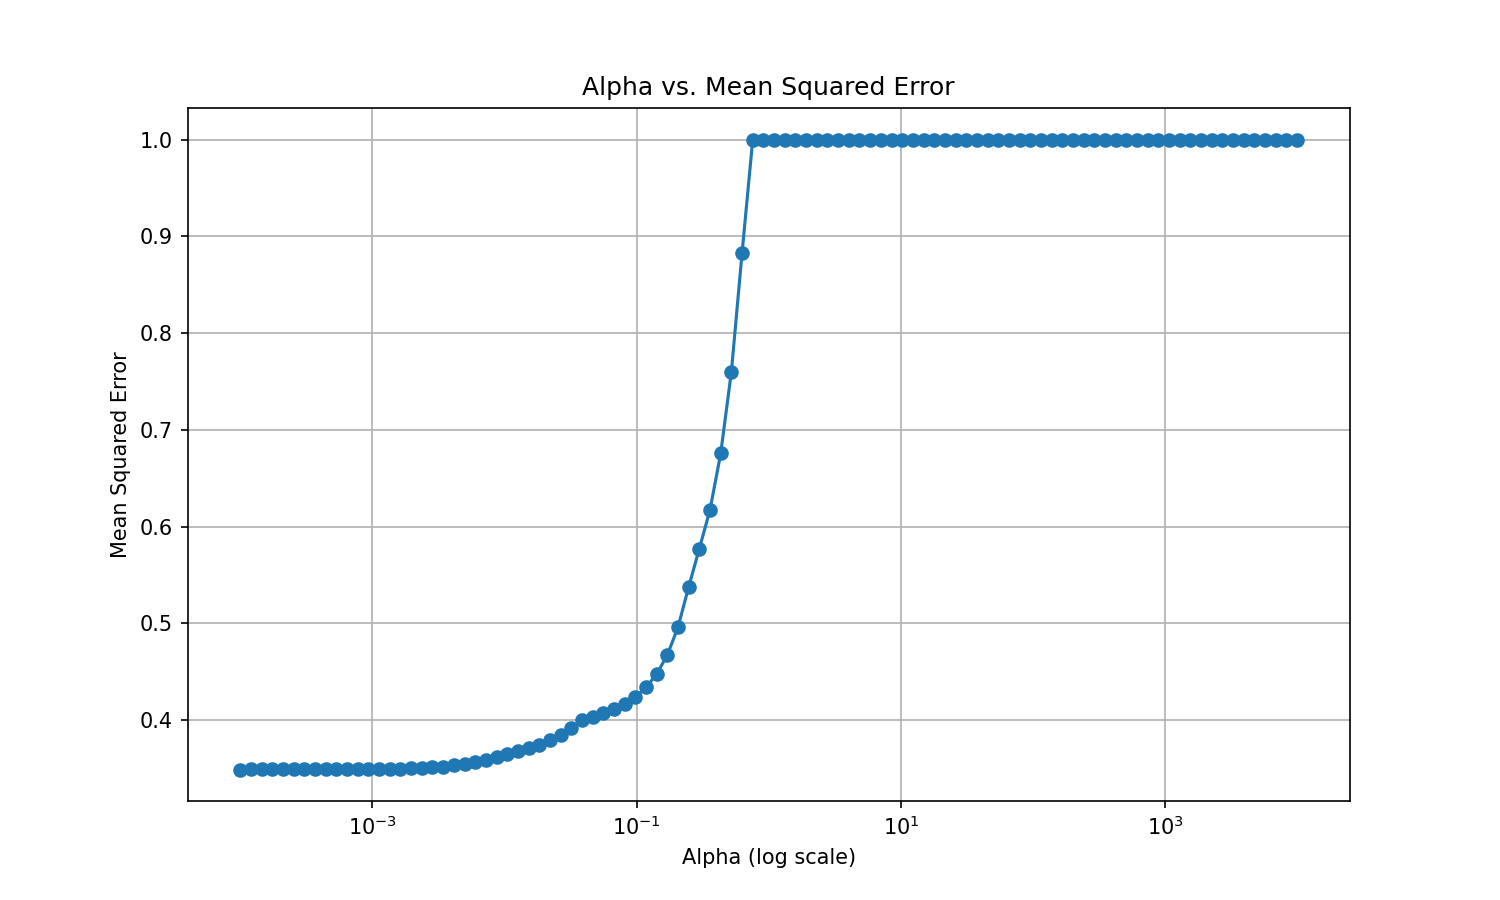

(   Optimal Alpha  Best Mean Squared Error
 0         0.0001                    0.349,
                      Feature  Coefficient
 0               Bit Position    -0.431905
 1                 Torque Avg     0.803501
 2                    WOH Avg    -0.042760
 3                    WOB Max    -0.419030
 4                    RPM Avg     0.471270
 5              Flow In Pumps    -0.037862
 6                Flow Paddle     0.019787
 7          Pressure: SPP Avg    -0.041000
 8       Weight: Overpull Max     0.002885
 9           Weight: Drag Max    -0.027840
 10             Hook Position    -0.042372
 11              Mud: MWI Avg    -0.010895
 12              Mud: MWO Avg     0.037867
 13    Mud:Temperature IN Avg     0.335228
 14  Mud: Temperature OUT Avg    -0.021547
 15              Pit 1 Volume     0.047482
 16              Pit 2 Volume     0.030196
 17              Pit 3 Volume     0.034492
 18              Pit 4 Volume    -0.160917
 19              Pit 5 Volume     0.153855
 20       

In [326]:
feature_selection_with_lasso(df, 'ROP (Time)')

In [286]:
X = df.drop('ROP (Time)', axis=1)
y = df['ROP (Time)']

lasso = Lasso(alpha=0.0001) 
scores = cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error')

mse_scores = -scores
print("Mean Squared Error for Each Fold:")
for i, mse in enumerate(mse_scores):
    print(f"Fold {i+1}: {mse:.2f}")

average_mse = mse_scores.mean()
print(f"Average Mean Squared Error: {average_mse:.2f}")

Mean Squared Error for Each Fold:
Fold 1: 0.88
Fold 2: 0.59
Fold 3: 0.28
Fold 4: 0.32
Fold 5: 0.49
Average Mean Squared Error: 0.51


### 5. Using Random forest 

In [288]:
X = df.drop(columns=['ROP (Time)'])
y = df['ROP (Time)']

rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X, y)

importances = rf_regressor.feature_importances_
k = 10
top_feature_indices = importances.argsort()[-k:][::-1]
selected_features = X.columns[top_feature_indices]

print(f"Selected features: {selected_features}")

Selected features: Index(['Torque Avg', 'Bit Position', 'Hook Position', 'Flow Paddle',
       'Gas Main: C1', 'WOB Max', 'WOH Avg', 'Pressure: SPP Avg', 'RPM Avg',
       'Mud:Temperature IN Avg'],
      dtype='object')


In [290]:
X = df[selected_features]
y = df['ROP (Time)']

rf_regressor = RandomForestRegressor(random_state=42)
cv_scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -cv_scores

for i, mse in enumerate(mse_scores):
    print(f'Mean Squared Error (Fold {i+1}): {mse}')


mean_mse = mse_scores.mean()
print(f'Mean Squared Error (Mean of all folds): {mean_mse}')

Mean Squared Error (Fold 1): 0.6882462355692721
Mean Squared Error (Fold 2): 0.266103435306993
Mean Squared Error (Fold 3): 0.25000420100116133
Mean Squared Error (Fold 4): 0.17555349390414177
Mean Squared Error (Fold 5): 0.10775419544543406
Mean Squared Error (Mean of all folds): 0.29753231224540044


### 6. KNN

Best k value: 62
Best Mean Squared Error (MSE): 0.41


<IPython.core.display.Javascript object>


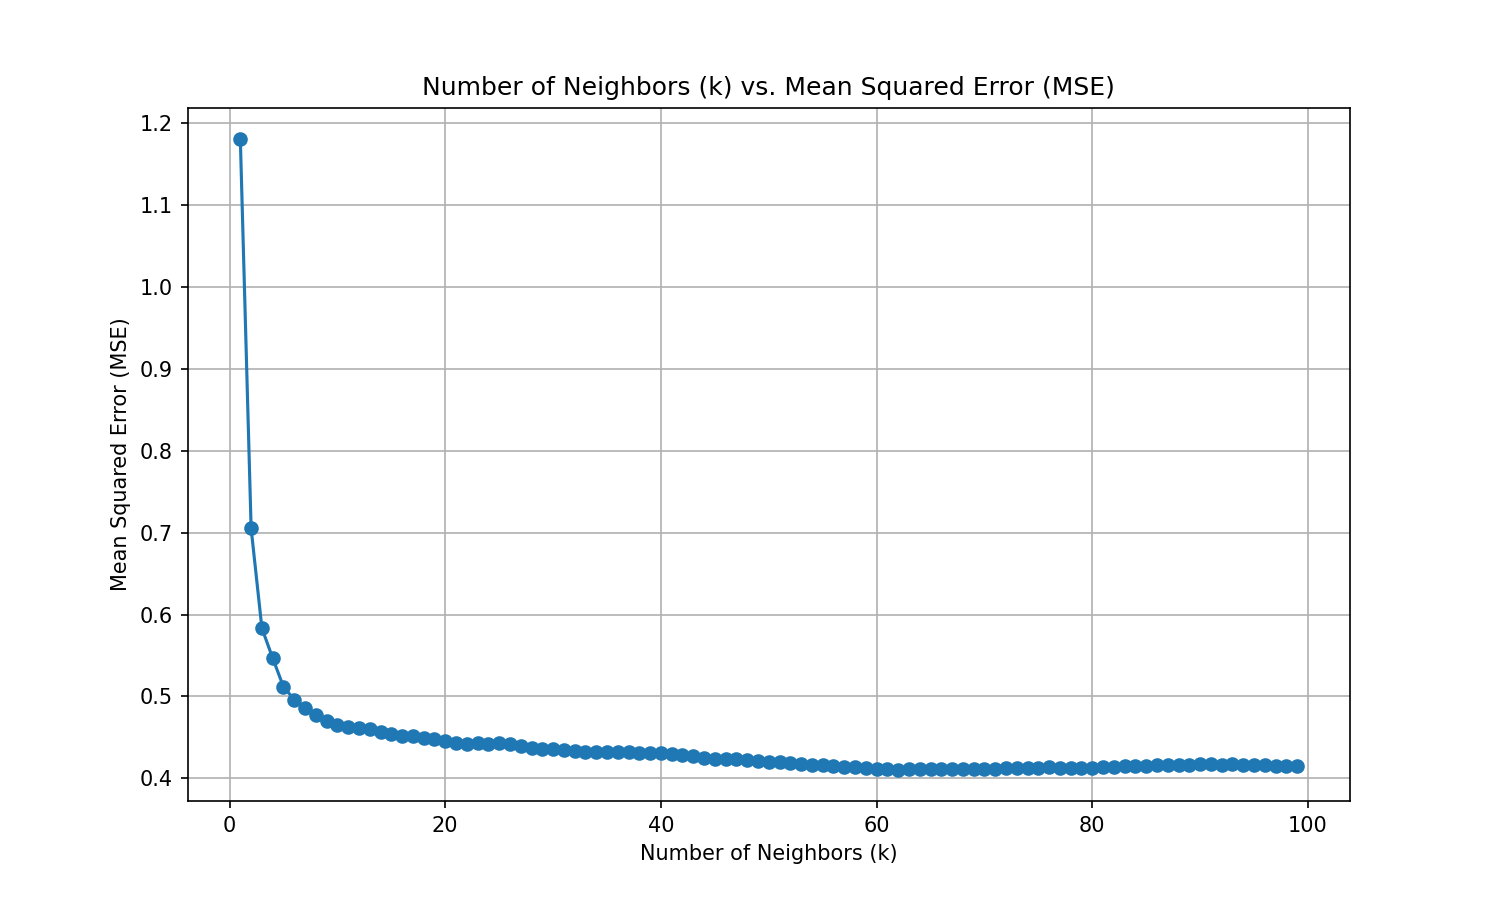

In [340]:
k_values = range(1,100) 
mse_results = []  

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    mse_scores = - cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_average = mse_scores.mean()
    mse_results.append(mse_average)

best_k = k_values[mse_results.index(min(mse_results))]
best_mse = min(mse_results)

print(f"Best k value: {best_k}")
print(f"Best Mean Squared Error (MSE): {best_mse:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_results, marker='o')
plt.title('Number of Neighbors (k) vs. Mean Squared Error (MSE)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

## Feature Extraction

> ## ML models

In [44]:
X_test = X_test.loc[:,X_test.columns[sel_.get_support()]]
(X_test.shape)

(14400, 23)

In [86]:
def evaluate_regression_models(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    lr = LinearRegression()
    dt = DecisionTreeRegressor() 
    rf = RandomForestRegressor(random_state=42)
    xg = XGBRegressor(random_state=42)
    svr = SVR(kernel='rbf')
    knn = KNeighborsRegressor()
    lasso = Lasso()
    ridge = Ridge()
    elasticnet = ElasticNet()
    lgbm = LGBMRegressor(verbose=-1)
    catboost = CatBoostRegressor(verbose=False)
    nn = keras.Sequential([
        layers.Dense(units=128, activation='relu'),
        layers.Dense(units=64, activation='relu'),
        layers.Dense(units=32, activation='relu'),
        layers.Dense(units=1)
    ])
    nn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    ml_names = ['Linear regression', 'Decision Tree regressor', 'Random forest regressor',
                'XG boost regressor', 'Support vector regressor', 'KNN regressor', 'Lasso regression',
                'Ridge regression', 'Elastic net regression', 'Cat boost regressor', 'LGBM regressor', 'Neural networks']  

    ml_models = [lr, dt, rf, xg, svr, knn, lasso, ridge, elasticnet, catboost, lgbm, nn]      

    results = pd.DataFrame(columns=['Model', 'Train RMSE', 'Test RMSE', 'Train R2', 'Test R2', 'Training Time'])

    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    for model_name, model in zip(ml_names, ml_models):
        start_time = time.time()  
        if model_name == 'Neural networks':
            model.fit(X_train, y_train, epochs=50, verbose=0, validation_data=[X_test, y_test])
        else:
            model.fit(X_train, y_train)
        end_time = time.time()  
        training_time = end_time - start_time  

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        results = results.append({
            'Model': model_name,
            'Train RMSE': train_rmse,
            'Test RMSE': test_rmse,
            'Train R2': train_r2,
            'Test R2': test_r2,
            'Training Time': training_time
        }, ignore_index=True)

    results = results.sort_values(by=['Test R2', 'Training Time'], ascending=[False, True])

    bar_width = 0.35
    x = np.arange(len(results['Model']))
    sns.set(style="whitegrid")
    palette = sns.color_palette("pastel")
    fig, ax = plt.subplots()
    train_r2_bars = ax.bar(x - bar_width/2, results['Train R2'], bar_width, label='Train R2', color=palette[0])
    test_r2_bars = ax.bar(x + bar_width/2, results['Test R2'], bar_width, label='Test R2', color=palette[1])
    ax.set_xlabel('Model')
    ax.set_ylabel('R2 Score')
    ax.set_title('Train R2 and Test R2 for Different Models')
    ax.set_xticks(x)
    ax.set_xticklabels(results['Model'])
    plt.xticks(rotation=45)
    ax.legend()
    plt.show()

    return results

450/450 [==============================] - 0s 944us/step


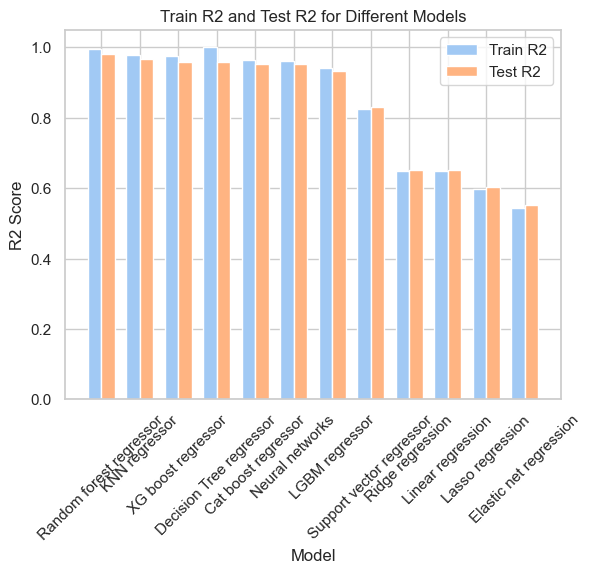

In [87]:
results = evaluate_regression_models()

In [88]:
results

Model    Train RMSE  Test RMSE  Train R2   Test R2  \
2    Random forest regressor  1.303501e+00   3.230063  0.996887  0.980337   
5              KNN regressor  3.370399e+00   4.263821  0.979190  0.965736   
3         XG boost regressor  3.660147e+00   4.689240  0.975458  0.958558   
1    Decision Tree regressor  2.228372e-15   4.743484  1.000000  0.957594   
9        Cat boost regressor  4.481944e+00   5.007445  0.963200  0.952743   
11           Neural networks  4.531946e+00   5.055174  0.962375  0.951837   
10            LGBM regressor  5.656657e+00   5.996525  0.941382  0.932230   
4   Support vector regressor  9.767322e+00   9.498231  0.825233  0.829971   
7           Ridge regression  1.386875e+01  13.598877  0.647642  0.651467   
0          Linear regression  1.386875e+01  13.598917  0.647642  0.651465   
6           Lasso regression  1.483701e+01  14.530901  0.596724  0.602056   
8     Elastic net regression  1.578456e+01  15.426088  0.543570  0.551514   

    Training Time  
2       40.300046  
5        0.002991  
3        3.501678  
1        0.638333  
9        9.168593  
11     125.839235  
10       0.421992  
4      199.656312  
7        0.011968  
0        0.021908  
6        0.020945  
8        0.024931

**So as the above results show that the most usefull models are: Random forest, KNN, XGBoost, Decision tree (It have overfiting), CatBoost and neural networks.**

**The best model is Random forest when ignoring the time consumption, while KNN apear the most usefull as it takes very low time to train.**

### Adaboost

In [94]:
knn_regressor = KNeighborsRegressor()
ada_knn = AdaBoostRegressor(base_estimator=knn_regressor)
rf_regressor = RandomForestRegressor(random_state=42)
ada_rf = AdaBoostRegressor(base_estimator=rf_regressor)

def evaluate_adaboost_regression_models(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, base_model=None):
    ada = AdaBoostRegressor(base_estimator=base_model, n_estimators=50, learning_rate=1.0)
    
    results = pd.DataFrame(columns=['Model', 'Train RMSE', 'Test RMSE', 'Train R2', 'Test R2', 'Training Time'])
    
    ml_models = [ada_rf, ada_knn]

    ml_names = ['Adaboost with Random forest', 'Adaboost with KNN']
    
    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    for model, model_name in zip(ml_models, ml_names):
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        training_time = end_time - start_time

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
    
        results = results.append({
            'Model': model_name,
            'Train RMSE': train_rmse,
            'Test RMSE': test_rmse,
            'Train R2': train_r2,
            'Test R2': test_r2,
            'Training Time': training_time
        }, ignore_index=True)

        
    results = results.sort_values(by=['Test R2', 'Training Time'], ascending=[False, True])
        
    bar_width = 0.35
    x = np.arange(len(results['Model']))
    sns.set(style="whitegrid")
    palette = sns.color_palette("pastel")
    fig, ax = plt.subplots()
    train_r2_bars = ax.bar(x - bar_width/2, results['Train R2'], bar_width, label='Train R2', color=palette[0])
    test_r2_bars = ax.bar(x + bar_width/2, results['Test R2'], bar_width, label='Test R2', color=palette[1])
    ax.set_xlabel('Model')
    ax.set_ylabel('R2 Score')
    ax.set_title('Train R2 and Test R2 for AdaBoost Regressor')
    ax.set_xticks(x)
    ax.set_xticklabels(results['Model'])
    plt.xticks(rotation=45)
    ax.legend()
    plt.show()

    return results

In [ ]:
results = evaluate_adaboost_regression_models()

In [ ]:
results